In [1]:
import wandb
import pandas as pd
from wandb.apis.public import Run
from scipy.stats import ranksums
import scipy.stats as stats
import numpy as np
from enum import Enum
from itertools import chain
api = wandb.Api()
import sys
sys.setrecursionlimit(100000)

from lib.stats import *
from lib.analysis_utils import *

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: chaosarium (nov2023_test). Use `wandb login --relogin` to force relogin


## All Stat Tests + Pickle

In [2]:
# all_runs_df, all_wandb_runs_iter = get_all_runs_df(run_iter_too=True)
with open("all_runs_df_cache.pkl", 'rb') as f:
    all_runs_df = pickle.load(f)
gt_filtered_df = mk_gt_filtered_df(all_runs_df)

In [3]:
all_runs_df

architecture              dataset   group    strat_id   strat_archi_id  \
0             GRU         Nromance_ipa  group4  BpallPiBst    GRUBpallPiBst   
1     Transformer         Nromance_ipa  group4  BpallPiBst  TransBpallPiBst   
2     Transformer         Nromance_ipa  group4  BpallPiBst  TransBpallPiBst   
3     Transformer         Nromance_ipa  group4  BpallPiBst  TransBpallPiBst   
4     Transformer         Nromance_ipa  group4  BpallPiBst  TransBpallPiBst   
...           ...                  ...     ...         ...              ...   
2635  Transformer  chinese_wikihan2022  group1        Supv        TransSupv   
2636  Transformer  chinese_wikihan2022  group1        Supv        TransSupv   
2637  Transformer  chinese_wikihan2022  group1        Supv        TransSupv   
2638  Transformer  chinese_wikihan2022  group1        Supv        TransSupv   
2639  Transformer  chinese_wikihan2022  group1        Supv        TransSupv   

      proportion_labelled     M.BCF     M.FER     M.TER     M.ACC     M.TED  \
0                     0.1  0.803941  0.046746  0.133918  0.389396  1.200684   
1                     0.1  0.788802  0.055818  0.142376  0.361460  1.276511   
2                     0.1  0.792195  0.055193  0.139896  0.361460  1.254276   
3                     0.1  0.791127  0.056245  0.141549  0.355188  1.269099   
4                     0.1  0.788732  0.056574  0.142185  0.355758  1.274800   
...                   ...       ...       ...       ...       ...       ...   
2635                  1.0  0.731203  0.073857  0.180499  0.519845  0.770571   
2636                  1.0  0.737312  0.066317  0.175510  0.544046  0.749274   
2637                  1.0  0.736497  0.063903  0.174150  0.545015  0.743466   
2638                  1.0  0.737746  0.067055  0.174830  0.564376  0.746370   
2639                  1.0  0.737402  0.070288  0.176417  0.543078  0.753146   

      wandb_id  exclude_unlabelled  (p2d, M.BCF)  (p2d, M.FER)  (p2d, M.TER)  \
0     xvi9h6ey               False      0.774267      0.058557      0.145231   
1     a65l0zaq               False      0.807809      0.053029      0.121759   
2     0sj3ka3b               False      0.808089      0.051971      0.121217   
3     jz3fcmfp               False      0.803538      0.053830      0.124739   
4     ghb7l5xj               False      0.808090      0.052464      0.121362   
...        ...                 ...           ...           ...           ...   
2635    _dummy                True           NaN           NaN           NaN   
2636    _dummy                True           NaN           NaN           NaN   
2637    _dummy                True           NaN           NaN           NaN   
2638    _dummy                True           NaN           NaN           NaN   
2639    _dummy                True           NaN           NaN           NaN   

      (p2d, M.ACC)  (p2d, M.TED)  
0         0.510242      1.064965  
1         0.583766      0.892846  
2         0.584225      0.888872  
3         0.572913      0.914705  
4         0.581932      0.889942  
...            ...           ...  
2635           NaN           NaN  
2636           NaN           NaN  
2637           NaN           NaN  
2638           NaN           NaN  
2639           NaN           NaN  

[2640 rows x 18 columns]

In [4]:
strat_pairs = get_pairs(ALL_STRATS)
strat_archi_pairs = get_pairs(ALL_STRAT_ARCHIS)

In [5]:
gt_filtered_df(dataset="Nromance_ipa", group="group2", architecture="GRU", strat_id="SupvBst")

architecture       dataset   group strat_id strat_archi_id  \
357           GRU  Nromance_ipa  group2  SupvBst     GRUSupvBst   
359           GRU  Nromance_ipa  group2  SupvBst     GRUSupvBst   
450           GRU  Nromance_ipa  group2  SupvBst     GRUSupvBst   
452           GRU  Nromance_ipa  group2  SupvBst     GRUSupvBst   
458           GRU  Nromance_ipa  group2  SupvBst     GRUSupvBst   
558           GRU  Nromance_ipa  group2  SupvBst     GRUSupvBst   
582           GRU  Nromance_ipa  group2  SupvBst     GRUSupvBst   
603           GRU  Nromance_ipa  group2  SupvBst     GRUSupvBst   
1515          GRU  Nromance_ipa  group2  SupvBst     GRUSupvBst   
1559          GRU  Nromance_ipa  group2  SupvBst     GRUSupvBst   

      proportion_labelled     M.BCF     M.FER     M.TER     M.ACC     M.TED  \
357                   0.1  0.789653  0.051152  0.145746  0.347777  1.306728   
359                   0.1  0.789025  0.049346  0.144919  0.352338  1.299316   
450                   0.1  0.796205  0.048134  0.140913  0.346636  1.263398   
452                   0.1  0.786454  0.053053  0.148925  0.352338  1.335234   
458                   0.1  0.790197  0.050083  0.144029  0.356899  1.291334   
558                   0.1  0.786742  0.053790  0.146064  0.351197  1.309578   
582                   0.1  0.794549  0.049721  0.141613  0.353478  1.269669   
603                   0.1  0.785596  0.051456  0.148162  0.336944  1.328392   
1515                  0.1  0.792627  0.051407  0.143330  0.369441  1.285063   
1559                  0.1  0.781788  0.053164  0.152550  0.325542  1.367731   

      wandb_id  exclude_unlabelled  (p2d, M.BCF)  (p2d, M.FER)  (p2d, M.TER)  \
357   frio1jd0               False           NaN           NaN           NaN   
359   je3arkxw               False           NaN           NaN           NaN   
450   znmta2zh               False           NaN           NaN           NaN   
452   v0tqizlg               False           NaN           NaN           NaN   
458   r1ftx4zm               False           NaN           NaN           NaN   
558   wliav4e4               False           NaN           NaN           NaN   
582   lh1zzfmo               False           NaN           NaN           NaN   
603   venz91cp               False           NaN           NaN           NaN   
1515  cxj73va0               False           NaN           NaN           NaN   
1559  wan0c2yq               False           NaN           NaN           NaN   

      (p2d, M.ACC)  (p2d, M.TED)  
357            NaN           NaN  
359            NaN           NaN  
450            NaN           NaN  
452            NaN           NaN  
458            NaN           NaN  
558            NaN           NaN  
582            NaN           NaN  
603            NaN           NaN  
1515           NaN           NaN  
1559           NaN           NaN

### Execute all strat pair stat comparison

Warning: next block very slow

In [ ]:
stat_test_res_flat = {}
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in ALL_PORPORTIONS:
        for g in gt_groups_for_porportion(p):            
            for a in ['Transformer', 'GRU']:
                # print(f"in {(d, p, g, a)}")                
                for s1, s2 in strat_pairs:
                    s1_df = gt_filtered_df(strat_id=s1, dataset=d, proportion_labelled=p, group=g, architecture=a)
                    s2_df = gt_filtered_df(strat_id=s2, dataset=d, proportion_labelled=p, group=g, architecture=a)
                    assert (9 <= len(s1_df) <= 10)
                    assert (9 <= len(s2_df) <= 10)
                    if len(s1_df) != 10:
                        print("WARNING:", d, p, g, a, s1, "has wrong num of runs:", len(s1_df))
                    stat_test_res_flat[(d, p, g, a, s1, s2)] = stat_cmp(s1_df, s2_df)

### Save results for later, if necessary

In [8]:
import pickle

def dumppkl():

    # Pickle stat_test_res_flat
    with open('stat_test_res_flat.pkl', 'wb') as f:
    # with open('transd_stat_test_res_flat.pkl', 'wb') as f:
        pickle.dump(stat_test_res_flat, f)

def loadpkl():
    global stat_test_res_flat
    
    with open('stat_test_res_flat.pkl', 'rb') as f:
    # with open('transd_stat_test_res_flat.pkl', 'rb') as f:
        stat_test_res_flat = pickle.load(f)

# dumppkl()
loadpkl()

### Make DF

In [9]:
stat_test_res_df = pd.DataFrame.from_dict(stat_test_res_flat, orient='index')
stat_test_res_df

M.ACC  \
Nromance_ipa        0.05 group1 Transformer BpallPiBst BpallPiBst  {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                       BpallBst    {'ranksum_pval': 0.001248454457570774, 'ranksu...   
                                                       BpallPi     {'ranksum_pval': 7.852614211537559e-05, 'ranks...   
                                                       Bpall       {'ranksum_pval': 7.852614211537559e-05, 'ranks...   
                                                       PiBst       {'ranksum_pval': 7.852614211537559e-05, 'ranks...   
...                                                                                                              ...   
chinese_wikihan2022 0.30 group1 GRU         Supv       Bpall       {'ranksum_pval': 0.9998939085643888, 'ranksum_...   
                                                       PiBst       {'ranksum_pval': 0.9994239774509289, 'ranksum_...   
                                                       SupvBst     {'ranksum_pval': 0.9589506456728627, 'ranksum_...   
                                                       Pi          {'ranksum_pval': 0.9967491488134591, 'ranksum_...   
                                                       Supv        {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   

                                                                                                               M.TED  \
Nromance_ipa        0.05 group1 Transformer BpallPiBst BpallPiBst  {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                       BpallBst    {'ranksum_pval': 0.00019052922602534275, 'rank...   
                                                       BpallPi     {'ranksum_pval': 7.852614211537559e-05, 'ranks...   
                                                       Bpall       {'ranksum_pval': 7.852614211537559e-05, 'ranks...   
                                                       PiBst       {'ranksum_pval': 7.852614211537559e-05, 'ranks...   
...                                                                                                              ...   
chinese_wikihan2022 0.30 group1 GRU         Supv       Bpall       {'ranksum_pval': 0.9998939085643888, 'ranksum_...   
                                                       PiBst       {'ranksum_pval': 0.99299036144302, 'ranksum_st...   
                                                       SupvBst     {'ranksum_pval': 0.8938530819038342, 'ranksum_...   
                                                       Pi          {'ranksum_pval': 0.9518481539856559, 'ranksum_...   
                                                       Supv        {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   

                                                                                                               M.TER  \
Nromance_ipa        0.05 group1 Transformer BpallPiBst BpallPiBst  {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                       BpallBst    {'ranksum_pval': 0.00019052922602534275, 'rank...   
                                                       BpallPi     {'ranksum_pval': 7.852614211537559e-05, 'ranks...   
                                                       Bpall       {'ranksum_pval': 7.852614211537559e-05, 'ranks...   
                                                       PiBst       {'ranksum_pval': 7.852614211537559e-05, 'ranks...   
...                                                                                                              ...   
chinese_wikihan2022 0.30 group1 GRU         Supv       Bpall       {'ranksum_pval': 0.9998939085643888, 'ranksum_...   
                                                       PiBst       {'ranksum_pval': 0.99299036144302, 'ranksum_st...   
                                                       SupvBst     {'ranksum_pval': 0.8938530819038342, 'ranksum_...   
                             

### Get Means

Much faster. No need to cache

In [10]:
stat_perf_means = {} # dataset -> dataset res
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in ALL_PORPORTIONS:
        for a in ['Transformer', 'GRU']:
            for s1 in ALL_STRATS:
                strat_df = gt_filtered_df(strat_id=s1, dataset=d, proportion_labelled=p, architecture=a)
                stat_perf_means[(d, p, a, s1)] = dict(strat_df[allM].mean())

In [11]:
stat_perf_means_df = pd.DataFrame.from_dict(stat_perf_means, orient='index')
stat_perf_means_df

M.ACC     M.TED     M.TER  \
Nromance_ipa        0.05 Transformer BpallPiBst  0.273831  1.550798  0.172968   
                                     BpallBst    0.260433  1.616876  0.180338   
                                     BpallPi     0.163284  2.304618  0.257046   
                                     Bpall       0.235234  1.828392  0.203930   
                                     PiBst       0.181927  2.114823  0.235877   
...                                                   ...       ...       ...   
chinese_wikihan2022 0.30 GRU         Bpall       0.476670  0.869603  0.203696   
                                     PiBst       0.477251  0.878800  0.205850   
                                     SupvBst     0.455857  0.906583  0.212358   
                                     Pi          0.462827  0.904550  0.211882   
                                     Supv        0.448209  0.919942  0.215488   

                                                    M.FER     M.BCF  
Nromance_ipa        0.05 Transformer BpallPiBst  0.071728  0.752344  
                                     BpallBst    0.075081  0.740258  
                                     BpallPi     0.114939  0.647423  
                                     Bpall       0.085362  0.711011  
                                     PiBst       0.112690  0.672400  
...                                                   ...       ...  
chinese_wikihan2022 0.30 GRU         Bpall       0.082430  0.702027  
                                     PiBst       0.082502  0.700506  
                                     SupvBst     0.085307  0.689656  
                                     Pi          0.085676  0.692370  
                                     Supv        0.086616  0.686714  

[128 rows x 5 columns]

### Find Reconstruction Bests

In [12]:
best_for_dpam = {}
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in ALL_PORPORTIONS:
        for a in ['Transformer', 'GRU']:
            for m in allM:
                means = []
                for x in ALL_STRATS:
                    s_m_perf = stat_perf_means[(d, p, a, x)][m]
                    means.append((x, s_m_perf))
                means.sort(reverse=(m == M.ACC or m == M.BCF), key=lambda x: x[1])
                best_s = means[0][0]
                best_for_dpam[(d, p, a, m)] = best_s

In [13]:
best_for_dpam_df = pd.DataFrame.from_dict(best_for_dpam, orient='index')
best_for_dpam_df

0
(Nromance_ipa, 0.05, Transformer, M.ACC)  BpallPiBst
(Nromance_ipa, 0.05, Transformer, M.TED)  BpallPiBst
(Nromance_ipa, 0.05, Transformer, M.TER)  BpallPiBst
(Nromance_ipa, 0.05, Transformer, M.FER)  BpallPiBst
(Nromance_ipa, 0.05, Transformer, M.BCF)  BpallPiBst
...                                              ...
(chinese_wikihan2022, 0.3, GRU, M.ACC)       BpallPi
(chinese_wikihan2022, 0.3, GRU, M.TED)      BpallBst
(chinese_wikihan2022, 0.3, GRU, M.TER)      BpallBst
(chinese_wikihan2022, 0.3, GRU, M.FER)    BpallPiBst
(chinese_wikihan2022, 0.3, GRU, M.BCF)       BpallPi

[80 rows x 1 columns]

### Find Reflex Pred Bests

In [14]:
# only care about group 1 p2d perf
p2d_perf_means = {} # dataset -> dataset res
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in ALL_PORPORTIONS:
        for a in ['Transformer', 'GRU']:
            for s1 in HAS_P2D_STRATS:
                strat_df = gt_filtered_df(strat_id=s1, dataset=d, proportion_labelled=p, architecture=a, group="group1")
                p2d_perf_means[(d, p, a, s1)] = dict(strat_df[all_p2dM].mean())

In [15]:
p2d_perf_means_df = pd.DataFrame.from_dict(p2d_perf_means, orient='index')
p2d_perf_means_df = p2d_perf_means_df.droplevel(axis=1, level=0)
p2d_perf_means_df

M.ACC     M.TED     M.TER  \
Nromance_ipa        0.05 Transformer BpallPiBst  0.535066  1.030266  0.140499   
                                     BpallBst    0.521370  1.069917  0.145906   
                                     BpallPi     0.354356  1.607414  0.219205   
                                     Bpall       0.331260  1.631168  0.222444   
                         GRU         BpallPiBst  0.505121  1.088673  0.148464   
...                                                   ...       ...       ...   
chinese_wikihan2022 0.30 Transformer Bpall       0.595495  0.645484  0.190418   
                         GRU         BpallPiBst  0.596420  0.647850  0.191115   
                                     BpallBst    0.620222  0.608270  0.179439   
                                     BpallPi     0.420181  0.984098  0.290308   
                                     Bpall       0.144908  2.046636  0.603757   

                                                    M.FER     M.BCF  
Nromance_ipa        0.05 Transformer BpallPiBst  0.060827  0.782076  
                                     BpallBst    0.063348  0.774907  
                                     BpallPi     0.094803  0.678246  
                                     Bpall       0.093766  0.675701  
                         GRU         BpallPiBst  0.060209  0.769702  
...                                                   ...       ...  
chinese_wikihan2022 0.30 Transformer Bpall       0.050126  0.687438  
                         GRU         BpallPiBst  0.049500  0.687233  
                                     BpallBst    0.047171  0.703077  
                                     BpallPi     0.074756  0.567864  
                                     Bpall       0.152793  0.318786  

[64 rows x 5 columns]

In [16]:
p2d_best_for_dpam = {}
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in ALL_PORPORTIONS:
        for m in all_p2dM:
            means = []
            
            for a in ['Transformer', 'GRU']:
                for x in HAS_P2D_STRATS:
                    sa_m_perf = p2d_perf_means[(d, p, a, x)][m]
                    means.append((x, a, sa_m_perf))
                means.sort(reverse=(m[1] == M.ACC or m[1] == M.BCF), key=lambda x: x[2])
                best_sa = (means[0][0], means[0][1])
                p2d_best_for_dpam[(d, p, m)] = best_sa

In [17]:
p2d_best_for_dpam_df = pd.DataFrame.from_dict(p2d_best_for_dpam, orient='index')
p2d_best_for_dpam_df

0            1
(Nromance_ipa, 0.05, (p2d, M.ACC))         BpallPiBst  Transformer
(Nromance_ipa, 0.05, (p2d, M.TED))         BpallPiBst  Transformer
(Nromance_ipa, 0.05, (p2d, M.TER))         BpallPiBst  Transformer
(Nromance_ipa, 0.05, (p2d, M.FER))         BpallPiBst          GRU
(Nromance_ipa, 0.05, (p2d, M.BCF))         BpallPiBst  Transformer
(Nromance_ipa, 0.1, (p2d, M.ACC))          BpallPiBst  Transformer
(Nromance_ipa, 0.1, (p2d, M.TED))          BpallPiBst  Transformer
(Nromance_ipa, 0.1, (p2d, M.TER))          BpallPiBst  Transformer
(Nromance_ipa, 0.1, (p2d, M.FER))          BpallPiBst  Transformer
(Nromance_ipa, 0.1, (p2d, M.BCF))          BpallPiBst  Transformer
(Nromance_ipa, 0.2, (p2d, M.ACC))            BpallBst  Transformer
(Nromance_ipa, 0.2, (p2d, M.TED))            BpallBst  Transformer
(Nromance_ipa, 0.2, (p2d, M.TER))            BpallBst  Transformer
(Nromance_ipa, 0.2, (p2d, M.FER))            BpallBst  Transformer
(Nromance_ipa, 0.2, (p2d, M.BCF))            BpallBst  Transformer
(Nromance_ipa, 0.3, (p2d, M.ACC))            BpallBst  Transformer
(Nromance_ipa, 0.3, (p2d, M.TED))            BpallBst  Transformer
(Nromance_ipa, 0.3, (p2d, M.TER))            BpallBst  Transformer
(Nromance_ipa, 0.3, (p2d, M.FER))            BpallBst  Transformer
(Nromance_ipa, 0.3, (p2d, M.BCF))            BpallBst  Transformer
(chinese_wikihan2022, 0.05, (p2d, M.ACC))  BpallPiBst          GRU
(chinese_wikihan2022, 0.05, (p2d, M.TED))  BpallPiBst          GRU
(chinese_wikihan2022, 0.05, (p2d, M.TER))  BpallPiBst          GRU
(chinese_wikihan2022, 0.05, (p2d, M.FER))  BpallPiBst          GRU
(chinese_wikihan2022, 0.05, (p2d, M.BCF))  BpallPiBst          GRU
(chinese_wikihan2022, 0.1, (p2d, M.ACC))   BpallPiBst          GRU
(chinese_wikihan2022, 0.1, (p2d, M.TED))   BpallPiBst  Transformer
(chinese_wikihan2022, 0.1, (p2d, M.TER))   BpallPiBst  Transformer
(chinese_wikihan2022, 0.1, (p2d, M.FER))     BpallBst  Transformer
(chinese_wikihan2022, 0.1, (p2d, M.BCF))   BpallPiBst  Transformer
(chinese_wikihan2022, 0.2, (p2d, M.ACC))   BpallPiBst  Transformer
(chinese_wikihan2022, 0.2, (p2d, M.TED))   BpallPiBst  Transformer
(chinese_wikihan2022, 0.2, (p2d, M.TER))   BpallPiBst  Transformer
(chinese_wikihan2022, 0.2, (p2d, M.FER))   BpallPiBst  Transformer
(chinese_wikihan2022, 0.2, (p2d, M.BCF))   BpallPiBst  Transformer
(chinese_wikihan2022, 0.3, (p2d, M.ACC))     BpallBst          GRU
(chinese_wikihan2022, 0.3, (p2d, M.TED))     BpallBst          GRU
(chinese_wikihan2022, 0.3, (p2d, M.TER))     BpallBst          GRU
(chinese_wikihan2022, 0.3, (p2d, M.FER))     BpallBst          GRU
(chinese_wikihan2022, 0.3, (p2d, M.BCF))     BpallBst          GRU

In [18]:
# group 1 best p2d accs table

p2d_perf_for_diff_p = {}
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in ALL_PORPORTIONS:
        best_sa = p2d_best_for_dpam[(d, p, ("p2d", M.ACC))]
        (x, a) = best_sa
        mean_acc = p2d_perf_means[(d, p, a, x)][("p2d", M.ACC)]
        print(f"for {d}, {p}, best acc strat archi is {a}{x} with {mean_acc}")
        sa_id = f"{a}{x}".replace("Transformer", "Trans")
        p2d_perf_for_diff_p[(d, p)] = (sa_id, mean_acc)

for Nromance_ipa, 0.05, best acc strat archi is TransformerBpallPiBst with 0.5350657284259797
for Nromance_ipa, 0.1, best acc strat archi is TransformerBpallPiBst with 0.5795016765594483
for Nromance_ipa, 0.2, best acc strat archi is TransformerBpallBst with 0.600825434923172
for Nromance_ipa, 0.3, best acc strat archi is TransformerBpallBst with 0.6112656652927398
for chinese_wikihan2022, 0.05, best acc strat archi is GRUBpallPiBst with 0.45365151166915896
for chinese_wikihan2022, 0.1, best acc strat archi is GRUBpallPiBst with 0.5673729658126831
for chinese_wikihan2022, 0.2, best acc strat archi is TransformerBpallPiBst with 0.6183295667171478
for chinese_wikihan2022, 0.3, best acc strat archi is GRUBpallBst with 0.6202221632003784


### Make table

In [21]:
strat_vs_weak_base = {}
strat_vs_strong_base = {}
strat_vs_base_repr = {}

for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in ALL_PORPORTIONS:
        for g in gt_groups_for_porportion(p):            
            for a in ['Transformer', 'GRU']:            
                for x in ALL_STRATS:
                    
                    outperform_weak = {m: True for m in allM}
                    for s0 in WEAK_BASELINE_STRATS:
                        cmpres = stat_test_res_flat[(d, p, g, a, x, s0)]
                        for m in allM:
                            outperform_weak[m] = outperform_weak[m] and cmpres[m]['both_sig']
                    strat_vs_weak_base[(d, p, g, a, x)] = outperform_weak
                    
                    outperform_strong = {m: True for m in allM}
                    for s0 in STRONG_BASELINE_STRATS:
                        cmpres = stat_test_res_flat[(d, p, g, a, x, s0)]
                        for m in allM:
                            outperform_strong[m] = outperform_strong[m] and cmpres[m]['both_sig']
                    strat_vs_strong_base[(d, p, g, a, x)] = outperform_strong
                    
                    for m in allM:
                        if not (d, p, a, x) in strat_vs_base_repr:
                            strat_vs_base_repr[(d, p, a, x)] = {}
                        if not m in strat_vs_base_repr[(d, p, a, x)]:
                            strat_vs_base_repr[(d, p, a, x)][m] = ""
                            if m == M.ACC:
                                strat_vs_base_repr[(d, p, a, x)][m] += f"{(stat_perf_means[(d, p, a, x)][m]*100):#.2f}% "
                            else:
                                strat_vs_base_repr[(d, p, a, x)][m] += f"{stat_perf_means[(d, p, a, x)][m]:#.4f} "
                            
                        if outperform_strong[m]:
                            strat_vs_base_repr[(d, p, a, x)][m] += sig_mark(g, True)
                        elif outperform_weak[m]:
                            strat_vs_base_repr[(d, p, a, x)][m] += sig_mark(g, False)
                        else:
                            if x in WEAK_BASELINE_STRATS:
                                strat_vs_base_repr[(d, p, a, x)][m] += "□"
                            else:
                                strat_vs_base_repr[(d, p, a, x)][m] += "◌"

In [22]:
pd.DataFrame.from_dict(strat_vs_weak_base, orient='index')

M.ACC  M.TED  M.TER  \
Nromance_ipa        0.05 group1 Transformer BpallPiBst   True   True   True   
                                            BpallBst     True   True   True   
                                            BpallPi     False  False  False   
                                            Bpall        True   True   True   
                                            PiBst       False  False  False   
...                                                       ...    ...    ...   
chinese_wikihan2022 0.30 group1 GRU         Bpall        True  False  False   
                                            PiBst       False  False  False   
                                            SupvBst     False  False  False   
                                            Pi          False  False  False   
                                            Supv        False  False  False   

                                                        M.FER  M.BCF  
Nromance_ipa        0.05 group1 Transformer BpallPiBst   True   True  
                                            BpallBst     True   True  
                                            BpallPi     False  False  
                                            Bpall        True   True  
                                            PiBst       False  False  
...                                                       ...    ...  
chinese_wikihan2022 0.30 group1 GRU         Bpall       False   True  
                                            PiBst       False  False  
                                            SupvBst     False  False  
                                            Pi          False  False  
                                            Supv        False  False  

[224 rows x 5 columns]

In [23]:
pd.DataFrame.from_dict(strat_vs_strong_base, orient='index')

M.ACC  M.TED  M.TER  \
Nromance_ipa        0.05 group1 Transformer BpallPiBst   True   True   True   
                                            BpallBst     True   True   True   
                                            BpallPi     False  False  False   
                                            Bpall        True   True   True   
                                            PiBst       False  False  False   
...                                                       ...    ...    ...   
chinese_wikihan2022 0.30 group1 GRU         Bpall       False  False  False   
                                            PiBst       False  False  False   
                                            SupvBst     False  False  False   
                                            Pi          False  False  False   
                                            Supv        False  False  False   

                                                        M.FER  M.BCF  
Nromance_ipa        0.05 group1 Transformer BpallPiBst   True   True  
                                            BpallBst     True   True  
                                            BpallPi     False  False  
                                            Bpall        True   True  
                                            PiBst       False  False  
...                                                       ...    ...  
chinese_wikihan2022 0.30 group1 GRU         Bpall       False  False  
                                            PiBst       False  False  
                                            SupvBst     False  False  
                                            Pi          False  False  
                                            Supv        False  False  

[224 rows x 5 columns]

In [24]:
# decorating bests
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in ALL_PORPORTIONS:
        for a in ['Transformer', 'GRU']:            
            for x in ALL_STRATS:
                for m in allM:
                    if best_for_dpam[(d, p, a, m)] == x:
                        strat_vs_base_repr[(d, p, a, x)][m] = f"*{strat_vs_base_repr[(d, p, a, x)][m]}"

In [25]:
mean_indv_group_sig_df = pd.DataFrame.from_dict(strat_vs_base_repr, orient='index')
mean_indv_group_sig_df.index.set_names('dataset', level=0, inplace=True)
mean_indv_group_sig_df.index.set_names('porportionLabelled', level=1, inplace=True)
mean_indv_group_sig_df.index.set_names('architecture', level=2, inplace=True)
mean_indv_group_sig_df.index.set_names('stratArchiId', level=3, inplace=True)
mean_indv_group_sig_df

M.ACC  \
dataset             porportionLabelled architecture stratArchiId              
Nromance_ipa        0.05               Transformer  BpallPiBst    *27.38% ➊   
                                                    BpallBst       26.04% ➊   
                                                    BpallPi        16.33% ◌   
                                                    Bpall          23.52% ➊   
                                                    PiBst          18.19% ◌   
...                                                                     ...   
chinese_wikihan2022 0.30               GRU          Bpall          47.67% ①   
                                                    PiBst          47.73% ◌   
                                                    SupvBst        45.59% □   
                                                    Pi             46.28% □   
                                                    Supv           44.82% □   

                                                                      M.TED  \
dataset             porportionLabelled architecture stratArchiId              
Nromance_ipa        0.05               Transformer  BpallPiBst    *1.5508 ➊   
                                                    BpallBst       1.6169 ➊   
                                                    BpallPi        2.3046 ◌   
                                                    Bpall          1.8284 ➊   
                                                    PiBst          2.1148 ◌   
...                                                                     ...   
chinese_wikihan2022 0.30               GRU          Bpall          0.8696 ◌   
                                                    PiBst          0.8788 ◌   
                                                    SupvBst        0.9066 □   
                                                    Pi             0.9045 □   
                                                    Supv           0.9199 □   

                                                                      M.TER  \
dataset             porportionLabelled architecture stratArchiId              
Nromance_ipa        0.05               Transformer  BpallPiBst    *0.1730 ➊   
                                                    BpallBst       0.1803 ➊   
                                                    BpallPi        0.2570 ◌   
                                                    Bpall          0.2039 ➊   
                                                    PiBst          0.2359 ◌   
...                                                                     ...   
chinese_wikihan2022 0.30               GRU          Bpall          0.2037 ◌   
                                                    PiBst          0.2059 ◌   
                                                    SupvBst        0.2124 □   
                                                    Pi             0.2119 □   
                                                    Supv           0.2155 □   

                                                                      M.FER  \
dataset             porportionLabelled architecture stratArchiId              
Nromance_ipa        0.05               Transformer  BpallPiBst    *0.0717 ➊   
                                                    BpallBst       0.0751 ➊   
                                                    BpallPi        0.1149 ◌   
                                                    Bpall          0.0854 ➊   
                                                    PiBst          0.1127 ◌   
...                                                                     ...   
chinese_wikihan2022 0.30               GRU          Bpall          0.0824 ◌   
                                                    PiBst          0.0825 ◌   
                                                    SupvBst        0.0853 □   
                                                    Pi             0.0857 □   
                                      

### to latex table

In [26]:
mean_indv_group_sig_df

M.ACC  \
dataset             porportionLabelled architecture stratArchiId              
Nromance_ipa        0.05               Transformer  BpallPiBst    *27.38% ➊   
                                                    BpallBst       26.04% ➊   
                                                    BpallPi        16.33% ◌   
                                                    Bpall          23.52% ➊   
                                                    PiBst          18.19% ◌   
...                                                                     ...   
chinese_wikihan2022 0.30               GRU          Bpall          47.67% ①   
                                                    PiBst          47.73% ◌   
                                                    SupvBst        45.59% □   
                                                    Pi             46.28% □   
                                                    Supv           44.82% □   

                                                                      M.TED  \
dataset             porportionLabelled architecture stratArchiId              
Nromance_ipa        0.05               Transformer  BpallPiBst    *1.5508 ➊   
                                                    BpallBst       1.6169 ➊   
                                                    BpallPi        2.3046 ◌   
                                                    Bpall          1.8284 ➊   
                                                    PiBst          2.1148 ◌   
...                                                                     ...   
chinese_wikihan2022 0.30               GRU          Bpall          0.8696 ◌   
                                                    PiBst          0.8788 ◌   
                                                    SupvBst        0.9066 □   
                                                    Pi             0.9045 □   
                                                    Supv           0.9199 □   

                                                                      M.TER  \
dataset             porportionLabelled architecture stratArchiId              
Nromance_ipa        0.05               Transformer  BpallPiBst    *0.1730 ➊   
                                                    BpallBst       0.1803 ➊   
                                                    BpallPi        0.2570 ◌   
                                                    Bpall          0.2039 ➊   
                                                    PiBst          0.2359 ◌   
...                                                                     ...   
chinese_wikihan2022 0.30               GRU          Bpall          0.2037 ◌   
                                                    PiBst          0.2059 ◌   
                                                    SupvBst        0.2124 □   
                                                    Pi             0.2119 □   
                                                    Supv           0.2155 □   

                                                                      M.FER  \
dataset             porportionLabelled architecture stratArchiId              
Nromance_ipa        0.05               Transformer  BpallPiBst    *0.0717 ➊   
                                                    BpallBst       0.0751 ➊   
                                                    BpallPi        0.1149 ◌   
                                                    Bpall          0.0854 ➊   
                                                    PiBst          0.1127 ◌   
...                                                                     ...   
chinese_wikihan2022 0.30               GRU          Bpall          0.0824 ◌   
                                                    PiBst          0.0825 ◌   
                                                    SupvBst        0.0853 □   
                                                    Pi             0.0857 □   
                                      

In [27]:
def mk_indicator_matrix(a, b, c, d):
    s = r'$\scriptsize \begin{smallmatrix} \\[-3pt] \mbox{_A_} & \hspace{-2.7pt} \mbox{_B_}\\[-2pt]\mbox{_C_} & \hspace{-3pt} \mbox{_D_}\end{smallmatrix}$'
    s = s.replace('_A_', a)
    s = s.replace('_B_', b)
    s = s.replace('_C_', c)
    s = s.replace('_D_', d)
    s = s.replace("①", r"\ding{172}")
    s = s.replace("②", r"\ding{173}")
    s = s.replace("③", r"\ding{174}")
    s = s.replace("④", r"\ding{175}")
    s = s.replace("➊", r"\ding{182}")
    s = s.replace("➋", r"\ding{183}")
    s = s.replace("➌", r"\ding{184}")
    s = s.replace("➍", r"\ding{185}")
    s = s.replace("◌", r"\hphantom{\ding{172}}")
    s = s.replace("□", r"\hphantom{\ding{172}}")
    return s

def fix_indicator(s):
    s = s.replace("①", r"\ding{172}")
    s = s.replace("②", r"\ding{173}")
    s = s.replace("③", r"\ding{174}")
    s = s.replace("④", r"\ding{175}")
    s = s.replace("➊", r"\ding{182}")
    s = s.replace("➋", r"\ding{183}")
    s = s.replace("➌", r"\ding{184}")
    s = s.replace("➍", r"\ding{185}")
    s = s.replace("◌", r"\hphantom{\ding{172}}")
    s = s.replace("□", r"\hphantom{\ding{172}}")
    return s

In [29]:
def latex_sub_perf_table_gen(proportion_labelled, dataset):
    selected_df = mean_indv_group_sig_df.loc[[dataset], [proportion_labelled], :, :]
    selected_df = selected_df.droplevel(("dataset", "porportionLabelled"))
    selected_df = selected_df.rename(
        columns = {
            M.ACC: r"\textbf{ACC}\% $\uparrow$",
            M.TED: r"\textbf{TED} $\downarrow$",
            M.TER: r"\textbf{TER} $\downarrow$",
            M.FER: r"\textbf{FER} $\downarrow$",
            M.BCF: r"\textbf{BCFS} $\uparrow$",
        }
    )
    selected_df.index.set_names(r'\textbf{Architecture}', level=0, inplace=True)
    selected_df.index.set_names(r'\textbf{Strategy}', level=1, inplace=True)

    selected_df_s = selected_df.style

    def cell_formatter(s):
        if s[0] == '*': # best indicator
            s = s.replace('*', '')
            num, mark = s.split()[0], s.split()[1]
            if num[-1] == '%':
                num = num[:-2]
                s = f"\\textbf{{{num}}}\% {mark}"
            else:
                s = f"\\textbf{{{num}}} {mark}"
            
        if s[-4] in ["①", "②", "③", "④", "➊", "➋", "➌", "➍", "◌", "□"]:
            a, b, c, d = s[-4], s[-3], s[-2], s[-1]
            matrix = mk_indicator_matrix(a, b, c, d)
            s = s[:-4]
            s = s + matrix
        elif s[-1] in ["①", "②", "③", "④", "➊", "➋", "➌", "➍", "◌", "□"]:
            s = fix_indicator(s)
        return s
    
    # def index_formatter(s):
    #     if s in STRATS_LATEX_NAMES:
    #         return STRATS_LATEX_NAMES[s]
    #     else:
    #         return s
    
    selected_df_s = selected_df_s.format(cell_formatter, escape="latex")
    # selected_df_s = selected_df_s.format_index(index_formatter, escape="latex")
    print(selected_df_s.to_latex(
        # buf=f"{TABLES_OUT_PATH}/{dataset} {proportion_labelled} perf comparison.tex", 
        hrules=True,
        multirow_align='t',
        sparse_index=True,
        clines="skip-last;data",
    ))
    
    return selected_df, selected_df_s

latex_sub_perf_table_gen(proportion_labelled=0.05, dataset='chinese_wikihan2022')
latex_sub_perf_table_gen(proportion_labelled=0.1, dataset='chinese_wikihan2022')
latex_sub_perf_table_gen(proportion_labelled=0.2, dataset='chinese_wikihan2022')
latex_sub_perf_table_gen(proportion_labelled=0.3, dataset='chinese_wikihan2022')
latex_sub_perf_table_gen(proportion_labelled=0.05, dataset='Nromance_ipa')
latex_sub_perf_table_gen(proportion_labelled=0.1, dataset='Nromance_ipa')
latex_sub_perf_table_gen(proportion_labelled=0.2, dataset='Nromance_ipa')
latex_sub_perf_table_gen(proportion_labelled=0.3, dataset='Nromance_ipa')
_ = 0

\begin{tabular}{lllllll}
\toprule
 &  & \textbf{ACC}\% $\uparrow$ & \textbf{TED} $\downarrow$ & \textbf{TER} $\downarrow$ & \textbf{FER} $\downarrow$ & \textbf{BCFS} $\uparrow$ \\
\textbf{Architecture} & \textbf{Strategy} &  &  &  &  &  \\
\midrule
\multirow[t]{8}{*}{Transformer} & BpallPiBst & 21.85\% \ding{182} & 1.5150 \ding{182} & 0.3549 \ding{182} & 0.1575 \ding{182} & 0.5485 \ding{182} \\
 & BpallBst & 23.41\% \ding{182} & 1.4501 \ding{182} & 0.3397 \ding{182} & 0.1441 \ding{182} & 0.5676 \ding{182} \\
 & BpallPi & 23.90\% \ding{182} & 1.4488 \ding{182} & 0.3394 \ding{182} & 0.1445 \ding{182} & 0.5622 \ding{182} \\
 & Bpall & \textbf{25.46}\% \ding{182} & \textbf{1.3682} \ding{182} & \textbf{0.3205} \ding{182} & \textbf{0.1374} \ding{182} & \textbf{0.5747} \ding{182} \\
 & PiBst & 16.04\% \hphantom{\ding{172}} & 1.7841 \hphantom{\ding{172}} & 0.4179 \hphantom{\ding{172}} & 0.1805 \hphantom{\ding{172}} & 0.4872 \hphantom{\ding{172}} \\
 & SupvBst & 16.47\% \hphantom{\ding{172}} & 

Regex to fix perf table heads

### exclude_unlabelled tables (independent from previous steps)

In [30]:
strat_pairs = get_pairs(['Supv', 'Pi', 'Bpall', 'BpallPi'])
stat_test_res_flat = {}
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in [0.1, 1.0]:
        for g in ['group1']:            
            for a in ['Transformer', 'GRU']:
                for s1, s2 in strat_pairs:
                    # print(s1, d, p, g, a)
                    s1_df = gt_filtered_df(strat_id=s1, dataset=d, proportion_labelled=p, group=g, architecture=a, exclude_unlabelled=True if not (s1 == 'Supv' and p == 0.1) else False)
                    s2_df = gt_filtered_df(strat_id=s2, dataset=d, proportion_labelled=p, group=g, architecture=a, exclude_unlabelled=True if not (s2 == 'Supv' and p == 0.1) else False)
                    assert (len(s1_df) == 10 or len(s1_df) == 20)
                    assert (len(s2_df) == 10 or len(s2_df) == 20)
                    if len(s1_df) != 10 and len(s1_df) != 20:
                        print("WARNING:", d, p, g, a, s1, "has wrong num of runs:", len(s1_df))
                    if len(s1_df) == 20:
                        print("INFO:", d, p, g, a, s1, "has this num of runs:", len(s1_df))
                    stat_test_res_flat[(d, p, g, a, s1, s2)] = stat_cmp(s1_df, s2_df)
stat_test_res_df = pd.DataFrame.from_dict(stat_test_res_flat, orient='index')
stat_test_res_df

INFO: Nromance_ipa 1.0 group1 Transformer Supv has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 Transformer Supv has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 Transformer Supv has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 Transformer Supv has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 GRU Supv has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 GRU Supv has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 GRU Supv has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 GRU Supv has this num of runs: 20
INFO: chinese_wikihan2022 1.0 group1 Transformer Supv has this num of runs: 20
INFO: chinese_wikihan2022 1.0 group1 Transformer Supv has this num of runs: 20
INFO: chinese_wikihan2022 1.0 group1 Transformer Supv has this num of runs: 20
INFO: chinese_wikihan2022 1.0 group1 Transformer Supv has this num of runs: 20
INFO: chinese_wikihan2022 1.0 group1 GRU Supv has this num of runs: 20
INFO: chinese_wikihan2022 1.0 group1 GRU Supv has this num of runs: 2

M.ACC  \
Nromance_ipa        0.1 group1 Transformer Supv    Supv     {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                   Pi       {'ranksum_pval': 0.9984014502760328, 'ranksum_...   
                                                   Bpall    {'ranksum_pval': 0.87933920349141, 'ranksum_st...   
                                                   BpallPi  {'ranksum_pval': 0.4698714947885367, 'ranksum_...   
                                           Pi      Supv     {'ranksum_pval': 0.0015985497239672654, 'ranks...   
...                                                                                                       ...   
chinese_wikihan2022 1.0 group1 GRU         Bpall   BpallPi  {'ranksum_pval': 0.9943351516577627, 'ranksum_...   
                                           BpallPi Supv     {'ranksum_pval': 0.002983098555456009, 'ranksu...   
                                                   Pi       {'ranksum_pval': 0.9904450388965778, 'ranksum_...   
                                                   Bpall    {'ranksum_pval': 0.005664848342237332, 'ranksu...   
                                                   BpallPi  {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   

                                                                                                        M.TED  \
Nromance_ipa        0.1 group1 Transformer Supv    Supv     {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                   Pi       {'ranksum_pval': 0.9999214738578847, 'ranksum_...   
                                                   Bpall    {'ranksum_pval': 0.6188155907650801, 'ranksum_...   
                                                   BpallPi  {'ranksum_pval': 0.9994239774509289, 'ranksum_...   
                                           Pi      Supv     {'ranksum_pval': 7.852614211537559e-05, 'ranks...   
...                                                                                                       ...   
chinese_wikihan2022 1.0 group1 GRU         Bpall   BpallPi  {'ranksum_pval': 0.9922177943066831, 'ranksum_...   
                                           BpallPi Supv     {'ranksum_pval': 0.015553057205220098, 'ranksu...   
                                                   Pi       {'ranksum_pval': 0.8178269366832236, 'ranksum_...   
                                                   Bpall    {'ranksum_pval': 0.007782205693316907, 'ranksu...   
                                                   BpallPi  {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   

                                                                                                        M.TER  \
Nromance_ipa        0.1 group1 Transformer Supv    Supv     {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                   Pi       {'ranksum_pval': 0.9999214738578847, 'ranksum_...   
                                                   Bpall    {'ranksum_pval': 0.6188155907650801, 'ranksum_...   
                                                   BpallPi  {'ranksum_pval': 0.9994239774509289, 'ranksum_...   
                                           Pi      Supv     {'ranksum_pval': 7.852614211537559e-05, 'ranks...   
...                                                                                                       ...   
chinese_wikihan2022 1.0 group1 GRU         Bpall   BpallPi  {'ranksum_pval': 0.9922177943066831, 'ranksum_...   
                                           BpallPi Supv     {'ranksum_pval': 0.015553057205220098, 'ranksu...   
                                                   Pi       {'ranksum_pval': 0.8178269366832236, 'ranksum_...   
                                                   Bpall    {'ranksum_pval': 0.007782205693316907, 'ranksu...   
                                                   BpallPi  {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   

                                 

In [31]:
stat_perf_means = {} # dataset -> dataset res
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in [0.1, 1.0]:
        for a in ['Transformer', 'GRU']:
            for s1 in ['Supv', 'Pi', 'Bpall', 'BpallPi']:
                strat_df = gt_filtered_df(strat_id=s1, dataset=d, proportion_labelled=p, architecture=a, exclude_unlabelled=True if not (s1 == 'Supv' and p == 0.1) else False)
                stat_perf_means[(d, p, a, s1)] = dict(strat_df[allM].mean())
stat_perf_means_df = pd.DataFrame.from_dict(stat_perf_means, orient='index')
stat_perf_means_df

M.ACC     M.TED     M.TER  \
Nromance_ipa        0.1 Transformer Supv     0.269912  1.733053  0.193296   
                                    Pi       0.300057  1.526112  0.170215   
                                    Bpall    0.282155  1.671323  0.186411   
                                    BpallPi  0.274173  1.585975  0.176892   
                        GRU         Supv     0.306856  1.501839  0.167508   
                                    Pi       0.323774  1.423204  0.158737   
                                    Bpall    0.306784  1.500969  0.167411   
                                    BpallPi  0.323489  1.429418  0.159430   
                    1.0 Transformer Supv     0.530388  0.905017  0.114798   
                                    Pi       0.549544  0.886374  0.098862   
                                    Bpall    0.534436  0.931756  0.103923   
                                    BpallPi  0.532497  0.892075  0.099498   
                        GRU         Supv     0.519185  0.977509  0.124356   
                                    Pi       0.544299  0.922577  0.102900   
                                    Bpall    0.562030  0.865849  0.096573   
                                    BpallPi  0.556784  0.881015  0.098264   
chinese_wikihan2022 0.1 Transformer Supv     0.332478  1.189109  0.278537   
                                    Pi       0.322072  1.214134  0.284399   
                                    Bpall    0.335721  1.162149  0.272222   
                                    BpallPi  0.349274  1.130687  0.264853   
                        GRU         Supv     0.281583  1.325678  0.310527   
                                    Pi       0.294579  1.247531  0.292222   
                                    Bpall    0.265731  1.342401  0.314444   
                                    BpallPi  0.302711  1.239303  0.290295   
                    1.0 Transformer Supv     0.546225  0.745305  0.174580   
                                    Pi       0.568925  0.714424  0.167347   
                                    Bpall    0.563601  0.718296  0.168254   
                                    BpallPi  0.576283  0.696709  0.163197   
                        GRU         Supv     0.555760  0.736012  0.172404   
                                    Pi       0.573669  0.710939  0.166531   
                                    Bpall    0.552178  0.740465  0.173447   
                                    BpallPi  0.566312  0.720620  0.168798   

                                                M.FER     M.BCF  
Nromance_ipa        0.1 Transformer Supv     0.079409  0.721792  
                                    Pi       0.069902  0.753620  
                                    Bpall    0.074485  0.730803  
                                    BpallPi  0.074117  0.746504  
                        GRU         Supv     0.061159  0.755845  
                                    Pi       0.059109  0.771765  
                                    Bpall    0.062893  0.758769  
                                    BpallPi  0.059612  0.770243  
                    1.0 Transformer Supv     0.037692  0.841698  
                                    Pi       0.037924  0.844954  
                                    Bpall    0.039054  0.836726  
                                    BpallPi  0.037619  0.845902  
                        GRU         Supv     0.038985  0.827500  
                                    Pi       0.038815  0.839007  
                                    Bpall    0.035049  0.846221  
                                    BpallPi  0.037059  0.845338  
chinese_wikihan2022 0.1 Transformer Supv     0.114000  0.613779  
                                    Pi       0.113968  0.607726  
                                    Bpall    0.110805  0.624586  
                                    BpallPi  0.109677  0.634390  
                        GRU         Supv     0.123391  0.583471  
                                    Pi       0.115741 

In [32]:
best_for_dpam = {}
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in [0.1, 1.0]:
        for a in ['Transformer', 'GRU']:
            for m in allM:
                means = []
                for x in ['Supv', 'Pi', 'Bpall', 'BpallPi']:
                    s_m_perf = stat_perf_means[(d, p, a, x)][m]
                    means.append((x, s_m_perf))
                means.sort(reverse=(m == M.ACC or m == M.BCF), key=lambda x: x[1])
                best_s = means[0][0]
                best_for_dpam[(d, p, a, m)] = best_s

In [33]:
best_for_dpam_df = pd.DataFrame.from_dict(best_for_dpam, orient='index')
best_for_dpam_df

0
(Nromance_ipa, 0.1, Transformer, M.ACC)              Pi
(Nromance_ipa, 0.1, Transformer, M.TED)              Pi
(Nromance_ipa, 0.1, Transformer, M.TER)              Pi
(Nromance_ipa, 0.1, Transformer, M.FER)              Pi
(Nromance_ipa, 0.1, Transformer, M.BCF)              Pi
(Nromance_ipa, 0.1, GRU, M.ACC)                      Pi
(Nromance_ipa, 0.1, GRU, M.TED)                      Pi
(Nromance_ipa, 0.1, GRU, M.TER)                      Pi
(Nromance_ipa, 0.1, GRU, M.FER)                      Pi
(Nromance_ipa, 0.1, GRU, M.BCF)                      Pi
(Nromance_ipa, 1.0, Transformer, M.ACC)              Pi
(Nromance_ipa, 1.0, Transformer, M.TED)              Pi
(Nromance_ipa, 1.0, Transformer, M.TER)              Pi
(Nromance_ipa, 1.0, Transformer, M.FER)         BpallPi
(Nromance_ipa, 1.0, Transformer, M.BCF)         BpallPi
(Nromance_ipa, 1.0, GRU, M.ACC)                   Bpall
(Nromance_ipa, 1.0, GRU, M.TED)                   Bpall
(Nromance_ipa, 1.0, GRU, M.TER)                   Bpall
(Nromance_ipa, 1.0, GRU, M.FER)                   Bpall
(Nromance_ipa, 1.0, GRU, M.BCF)                   Bpall
(chinese_wikihan2022, 0.1, Transformer, M.ACC)  BpallPi
(chinese_wikihan2022, 0.1, Transformer, M.TED)  BpallPi
(chinese_wikihan2022, 0.1, Transformer, M.TER)  BpallPi
(chinese_wikihan2022, 0.1, Transformer, M.FER)  BpallPi
(chinese_wikihan2022, 0.1, Transformer, M.BCF)  BpallPi
(chinese_wikihan2022, 0.1, GRU, M.ACC)          BpallPi
(chinese_wikihan2022, 0.1, GRU, M.TED)          BpallPi
(chinese_wikihan2022, 0.1, GRU, M.TER)          BpallPi
(chinese_wikihan2022, 0.1, GRU, M.FER)          BpallPi
(chinese_wikihan2022, 0.1, GRU, M.BCF)               Pi
(chinese_wikihan2022, 1.0, Transformer, M.ACC)  BpallPi
(chinese_wikihan2022, 1.0, Transformer, M.TED)  BpallPi
(chinese_wikihan2022, 1.0, Transformer, M.TER)  BpallPi
(chinese_wikihan2022, 1.0, Transformer, M.FER)  BpallPi
(chinese_wikihan2022, 1.0, Transformer, M.BCF)  BpallPi
(chinese_wikihan2022, 1.0, GRU, M.ACC)               Pi
(chinese_wikihan2022, 1.0, GRU, M.TED)               Pi
(chinese_wikihan2022, 1.0, GRU, M.TER)               Pi
(chinese_wikihan2022, 1.0, GRU, M.FER)          BpallPi
(chinese_wikihan2022, 1.0, GRU, M.BCF)               Pi

In [34]:
strat_vs_weak_base = {}
strat_vs_strong_base = {}
strat_vs_base_repr = {}

for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in [0.1, 1.0]:
        for g in ['group1']:            
            for a in ['Transformer', 'GRU']:            
                for x in ['Supv', 'Pi', 'Bpall', 'BpallPi']:
                    
                    outperform_weak = {m: True for m in allM}
                    for s0 in ['Supv']: # WEAK_BASELINE_STRATS:
                        cmpres = stat_test_res_flat[(d, p, g, a, x, s0)]
                        for m in allM:
                            outperform_weak[m] = outperform_weak[m] and cmpres[m]['both_sig']
                    strat_vs_weak_base[(d, p, g, a, x)] = outperform_weak
                    
                    outperform_strong = {m: True for m in allM}
                    for s0 in ['Pi', 'Supv']: # STRONG_BASELINE_STRATS:
                        cmpres = stat_test_res_flat[(d, p, g, a, x, s0)]
                        for m in allM:
                            outperform_strong[m] = outperform_strong[m] and cmpres[m]['both_sig']
                    strat_vs_strong_base[(d, p, g, a, x)] = outperform_strong
                    
                    for m in allM:
                        if not (d, p, a, x) in strat_vs_base_repr:
                            strat_vs_base_repr[(d, p, a, x)] = {}
                        if not m in strat_vs_base_repr[(d, p, a, x)]:
                            strat_vs_base_repr[(d, p, a, x)][m] = ""
                            if m == M.ACC:
                                strat_vs_base_repr[(d, p, a, x)][m] += f"{(stat_perf_means[(d, p, a, x)][m]*100):#.2f}% "
                            else:
                                strat_vs_base_repr[(d, p, a, x)][m] += f"{stat_perf_means[(d, p, a, x)][m]:#.4f} "
                            
                        if outperform_strong[m]:
                            strat_vs_base_repr[(d, p, a, x)][m] += sig_mark(g, True)
                        elif outperform_weak[m]:
                            strat_vs_base_repr[(d, p, a, x)][m] += sig_mark(g, False)
                        else:
                            if x in WEAK_BASELINE_STRATS:
                                strat_vs_base_repr[(d, p, a, x)][m] += "□"
                            else:
                                strat_vs_base_repr[(d, p, a, x)][m] += "◌"

In [35]:
pd.DataFrame.from_dict(strat_vs_weak_base, orient='index')

M.ACC  M.TED  M.TER  \
Nromance_ipa        0.1 group1 Transformer Supv     False  False  False   
                                           Pi        True   True   True   
                                           Bpall    False  False  False   
                                           BpallPi  False   True   True   
                               GRU         Supv     False  False  False   
                                           Pi        True   True   True   
                                           Bpall    False  False  False   
                                           BpallPi   True   True   True   
                    1.0 group1 Transformer Supv     False  False  False   
                                           Pi        True   True   True   
                                           Bpall    False  False   True   
                                           BpallPi  False  False   True   
                               GRU         Supv     False  False  False   
                                           Pi        True   True   True   
                                           Bpall     True   True   True   
                                           BpallPi   True   True   True   
chinese_wikihan2022 0.1 group1 Transformer Supv     False  False  False   
                                           Pi       False  False  False   
                                           Bpall    False  False  False   
                                           BpallPi   True   True   True   
                               GRU         Supv     False  False  False   
                                           Pi        True   True   True   
                                           Bpall    False  False  False   
                                           BpallPi   True   True   True   
                    1.0 group1 Transformer Supv     False  False  False   
                                           Pi        True   True   True   
                                           Bpall     True   True   True   
                                           BpallPi   True   True   True   
                               GRU         Supv     False  False  False   
                                           Pi        True   True   True   
                                           Bpall    False  False  False   
                                           BpallPi   True  False  False   

                                                    M.FER  M.BCF  
Nromance_ipa        0.1 group1 Transformer Supv     False  False  
                                           Pi        True   True  
                                           Bpall    False  False  
                                           BpallPi  False   True  
                               GRU         Supv     False  False  
                                           Pi       False   True  
                                           Bpall    False  False  
                                           BpallPi  False   True  
                    1.0 group1 Transformer Supv     False  False  
                                           Pi       False  False  
                                           Bpall    False  False  
                                           BpallPi  False   True  
                               GRU         Supv     False  False  
                                           Pi       False   True  
                                           Bpall     True   True  
                                           BpallPi   True   True  
chinese_wikihan2022 0.1 group1 Transformer Supv     False  False  
                                           Pi       False  False  
                                           Bpall    False   True  
                                           BpallPi  False   True  
                               GRU         Supv     False  False  
                                           Pi        True   True  
                                   

In [36]:
pd.DataFrame.from_dict(strat_vs_strong_base, orient='index')

M.ACC  M.TED  M.TER  \
Nromance_ipa        0.1 group1 Transformer Supv     False  False  False   
                                           Pi       False  False  False   
                                           Bpall    False  False  False   
                                           BpallPi  False  False  False   
                               GRU         Supv     False  False  False   
                                           Pi       False  False  False   
                                           Bpall    False  False  False   
                                           BpallPi  False  False  False   
                    1.0 group1 Transformer Supv     False  False  False   
                                           Pi       False  False  False   
                                           Bpall    False  False  False   
                                           BpallPi  False  False  False   
                               GRU         Supv     False  False  False   
                                           Pi       False  False  False   
                                           Bpall     True   True   True   
                                           BpallPi   True   True   True   
chinese_wikihan2022 0.1 group1 Transformer Supv     False  False  False   
                                           Pi       False  False  False   
                                           Bpall    False  False  False   
                                           BpallPi   True   True   True   
                               GRU         Supv     False  False  False   
                                           Pi       False  False  False   
                                           Bpall    False  False  False   
                                           BpallPi  False  False  False   
                    1.0 group1 Transformer Supv     False  False  False   
                                           Pi       False  False  False   
                                           Bpall    False  False  False   
                                           BpallPi  False   True   True   
                               GRU         Supv     False  False  False   
                                           Pi       False  False  False   
                                           Bpall    False  False  False   
                                           BpallPi  False  False  False   

                                                    M.FER  M.BCF  
Nromance_ipa        0.1 group1 Transformer Supv     False  False  
                                           Pi       False  False  
                                           Bpall    False  False  
                                           BpallPi  False  False  
                               GRU         Supv     False  False  
                                           Pi       False  False  
                                           Bpall    False  False  
                                           BpallPi  False  False  
                    1.0 group1 Transformer Supv     False  False  
                                           Pi       False  False  
                                           Bpall    False  False  
                                           BpallPi  False  False  
                               GRU         Supv     False  False  
                                           Pi       False  False  
                                           Bpall     True   True  
                                           BpallPi   True   True  
chinese_wikihan2022 0.1 group1 Transformer Supv     False  False  
                                           Pi       False  False  
                                           Bpall    False   True  
                                           BpallPi  False   True  
                               GRU         Supv     False  False  
                                           Pi       False  False  
                                   

In [37]:
# decorating bests
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in [0.1, 1.0]:
        for a in ['Transformer', 'GRU']:            
            for x in ['Supv', 'Pi', 'Bpall', 'BpallPi']:
                for m in allM:
                    if best_for_dpam[(d, p, a, m)] == x:
                        strat_vs_base_repr[(d, p, a, x)][m] = f"*{strat_vs_base_repr[(d, p, a, x)][m]}"

In [38]:
mean_indv_group_sig_df = pd.DataFrame.from_dict(strat_vs_base_repr, orient='index')
mean_indv_group_sig_df.index.set_names('dataset', level=0, inplace=True)
mean_indv_group_sig_df.index.set_names('porportionLabelled', level=1, inplace=True)
mean_indv_group_sig_df.index.set_names('architecture', level=2, inplace=True)
mean_indv_group_sig_df.index.set_names('stratArchiId', level=3, inplace=True)
mean_indv_group_sig_df

M.ACC  \
dataset             porportionLabelled architecture stratArchiId              
Nromance_ipa        0.1                Transformer  Supv           26.99% □   
                                                    Pi            *30.01% ①   
                                                    Bpall          28.22% ◌   
                                                    BpallPi        27.42% ◌   
                                       GRU          Supv           30.69% □   
                                                    Pi            *32.38% ①   
                                                    Bpall          30.68% ◌   
                                                    BpallPi        32.35% ①   
                    1.0                Transformer  Supv           53.04% □   
                                                    Pi            *54.95% ①   
                                                    Bpall          53.44% ◌   
                                                    BpallPi        53.25% ◌   
                                       GRU          Supv           51.92% □   
                                                    Pi             54.43% ①   
                                                    Bpall         *56.20% ➊   
                                                    BpallPi        55.68% ➊   
chinese_wikihan2022 0.1                Transformer  Supv           33.25% □   
                                                    Pi             32.21% □   
                                                    Bpall          33.57% ◌   
                                                    BpallPi       *34.93% ➊   
                                       GRU          Supv           28.16% □   
                                                    Pi             29.46% ①   
                                                    Bpall          26.57% ◌   
                                                    BpallPi       *30.27% ①   
                    1.0                Transformer  Supv           54.62% □   
                                                    Pi             56.89% ①   
                                                    Bpall          56.36% ①   
                                                    BpallPi       *57.63% ①   
                                       GRU          Supv           55.58% □   
                                                    Pi            *57.37% ①   
                                                    Bpall          55.22% ◌   
                                                    BpallPi        56.63% ①   

                                                                      M.TED  \
dataset             porportionLabelled architecture stratArchiId              
Nromance_ipa        0.1                Transformer  Supv           1.7331 □   
                                                    Pi            *1.5261 ①   
                                                    Bpall          1.6713 ◌   
                                                    BpallPi        1.5860 ①   
                                       GRU          Supv           1.5018 □   
                                                    Pi            *1.4232 ①   
                                                    Bpall          1.5010 ◌   
                                                    BpallPi        1.4294 ①   
                    1.0                Transformer  Supv           0.9050 □   
                                                    Pi            *0.8864 ①   
                                                    Bpall          0.9318 ◌   
                                                    BpallPi        0.8921 ◌   
                                       GRU          Supv           0.9775 □   
                                                    Pi             0.9226 ①   
                                                    Bpall         *0.8658 ➊   
                                        

In [39]:
def mk_indicator_matrix(a, b, c, d):
    s = r'$\scriptsize \begin{smallmatrix} \\[-3pt] \mbox{_A_} & \hspace{-2.7pt} \mbox{_B_}\\[-2pt]\mbox{_C_} & \hspace{-3pt} \mbox{_D_}\end{smallmatrix}$'
    s = s.replace('_A_', a)
    s = s.replace('_B_', b)
    s = s.replace('_C_', c)
    s = s.replace('_D_', d)
    s = s.replace("①", r"\ding{172}")
    s = s.replace("②", r"\ding{173}")
    s = s.replace("③", r"\ding{174}")
    s = s.replace("④", r"\ding{175}")
    s = s.replace("➊", r"\ding{182}")
    s = s.replace("➋", r"\ding{183}")
    s = s.replace("➌", r"\ding{184}")
    s = s.replace("➍", r"\ding{185}")
    s = s.replace("◌", r"\hphantom{\ding{172}}")
    s = s.replace("□", r"\hphantom{\ding{172}}")
    return s

def fix_indicator(s):
    s = s.replace("①", r"\ding{172}")
    s = s.replace("②", r"\ding{173}")
    s = s.replace("③", r"\ding{174}")
    s = s.replace("④", r"\ding{175}")
    s = s.replace("➊", r"\ding{182}")
    s = s.replace("➋", r"\ding{183}")
    s = s.replace("➌", r"\ding{184}")
    s = s.replace("➍", r"\ding{185}")
    s = s.replace("◌", r"\hphantom{\ding{172}}")
    s = s.replace("□", r"\hphantom{\ding{172}}")
    return s

In [40]:
def latex_sub_perf_table_gen(proportion_labelled, dataset):
    selected_df = mean_indv_group_sig_df.loc[[dataset], [proportion_labelled], :, :]
    selected_df = selected_df.droplevel(("dataset", "porportionLabelled"))
    selected_df = selected_df.rename(
        columns = {
            M.ACC: r"\textbf{ACC}\% $\uparrow$",
            M.TED: r"\textbf{TED} $\downarrow$",
            M.TER: r"\textbf{TER} $\downarrow$",
            M.FER: r"\textbf{FER} $\downarrow$",
            M.BCF: r"\textbf{BCFS} $\uparrow$",
        }
    )
    selected_df.index.set_names(r'\textbf{Architecture}', level=0, inplace=True)
    selected_df.index.set_names(r'\textbf{Strategy}', level=1, inplace=True)

    selected_df_s = selected_df.style

    def cell_formatter(s):
        if s[0] == '*': # best indicator
            s = s.replace('*', '')
            num, mark = s.split()[0], s.split()[1]
            if num[-1] == '%':
                num = num[:-2]
                s = f"\\textbf{{{num}}}\% {mark}"
            else:
                s = f"\\textbf{{{num}}} {mark}"
            
        if s[-4] in ["①", "②", "③", "④", "➊", "➋", "➌", "➍", "◌", "□"]:
            a, b, c, d = s[-4], s[-3], s[-2], s[-1]
            matrix = mk_indicator_matrix(a, b, c, d)
            s = s[:-4]
            s = s + matrix
        elif s[-1] in ["①", "②", "③", "④", "➊", "➋", "➌", "➍", "◌", "□"]:
            s = fix_indicator(s)
        return s
    
    # def index_formatter(s):
    #     if s in STRATS_LATEX_NAMES:
    #         return STRATS_LATEX_NAMES[s]
    #     else:
    #         return s
    
    selected_df_s = selected_df_s.format(cell_formatter, escape="latex")
    # selected_df_s = selected_df_s.format_index(index_formatter, escape="latex")
    print(selected_df_s.to_latex(
        # buf=f"{TABLES_OUT_PATH}/{dataset} {proportion_labelled} perf comparison exclude_unlabelled.tex", 
        hrules=True,
        multirow_align='t',
        sparse_index=True,
        clines="skip-last;data",
    ))
    
    return selected_df, selected_df_s

latex_sub_perf_table_gen(proportion_labelled=0.1, dataset='chinese_wikihan2022')
latex_sub_perf_table_gen(proportion_labelled=1.0, dataset='chinese_wikihan2022')
latex_sub_perf_table_gen(proportion_labelled=0.1, dataset='Nromance_ipa')
latex_sub_perf_table_gen(proportion_labelled=1.0, dataset='Nromance_ipa')
_ = 0

\begin{tabular}{lllllll}
\toprule
 &  & \textbf{ACC}\% $\uparrow$ & \textbf{TED} $\downarrow$ & \textbf{TER} $\downarrow$ & \textbf{FER} $\downarrow$ & \textbf{BCFS} $\uparrow$ \\
\textbf{Architecture} & \textbf{Strategy} &  &  &  &  &  \\
\midrule
\multirow[t]{4}{*}{Transformer} & Supv & 33.25\% \hphantom{\ding{172}} & 1.1891 \hphantom{\ding{172}} & 0.2785 \hphantom{\ding{172}} & 0.1140 \hphantom{\ding{172}} & 0.6138 \hphantom{\ding{172}} \\
 & Pi & 32.21\% \hphantom{\ding{172}} & 1.2141 \hphantom{\ding{172}} & 0.2844 \hphantom{\ding{172}} & 0.1140 \hphantom{\ding{172}} & 0.6077 \hphantom{\ding{172}} \\
 & Bpall & 33.57\% \hphantom{\ding{172}} & 1.1621 \hphantom{\ding{172}} & 0.2722 \hphantom{\ding{172}} & 0.1108 \hphantom{\ding{172}} & 0.6246 \ding{182} \\
 & BpallPi & \textbf{34.93}\% \ding{182} & \textbf{1.1307} \ding{182} & \textbf{0.2649} \ding{182} & \textbf{0.1097} \hphantom{\ding{172}} & \textbf{0.6344} \ding{182} \\
\cline{1-7}
\multirow[t]{4}{*}{GRU} & Supv & 28.16\% \hphant

### exclude_unlabelled tables 1.0 compare to reranked-recon (independent from previous steps)

In [41]:
strat_archi_pairs = get_pairs([('GRU', 'Supv'), ('GRU', 'Pi'), ('GRU', 'Bpall'), ('GRU', 'BpallPi'), ('GRU', 'GRUBS_GRU'), ('GRU', 'GRUBS_JTRANS'), ('Transformer', 'Supv'), ('Transformer', 'Pi'), ('Transformer', 'Bpall'), ('Transformer', 'BpallPi'), ])
stat_test_res_flat = {}
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in [1.0]:
        for g in ['group1']:
            # for a in ['Transformer', 'GRU']:
                for (a1, s1), (a2, s2) in strat_archi_pairs:
                    # print(s1, d, p, g, a)
                    s1_df = gt_filtered_df(strat_id=s1, dataset=d, proportion_labelled=p, group=g, architecture=a1, exclude_unlabelled=True if not (s1 == 'Supv' and p == 0.1) else False)
                    s2_df = gt_filtered_df(strat_id=s2, dataset=d, proportion_labelled=p, group=g, architecture=a2, exclude_unlabelled=True if not (s2 == 'Supv' and p == 0.1) else False)
                    assert (len(s1_df) in [10, 20])
                    assert (len(s2_df) in [10, 20])
                    if len(s1_df) == 20:
                        print("INFO:", d, p, g, (a1, s1), (a2, s2), "has this num of runs:", len(s1_df))
                    stat_test_res_flat[(d, p, g, (a1, s1), (a2, s2))] = stat_cmp(s1_df, s2_df)
stat_test_res_df = pd.DataFrame.from_dict(stat_test_res_flat, orient='index')
stat_test_res_df

INFO: Nromance_ipa 1.0 group1 ('GRU', 'Supv') ('GRU', 'Supv') has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 ('GRU', 'Supv') ('GRU', 'Pi') has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 ('GRU', 'Supv') ('GRU', 'Bpall') has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 ('GRU', 'Supv') ('GRU', 'BpallPi') has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 ('GRU', 'Supv') ('GRU', 'GRUBS_GRU') has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 ('GRU', 'Supv') ('GRU', 'GRUBS_JTRANS') has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 ('GRU', 'Supv') ('Transformer', 'Supv') has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 ('GRU', 'Supv') ('Transformer', 'Pi') has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 ('GRU', 'Supv') ('Transformer', 'Bpall') has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 ('GRU', 'Supv') ('Transformer', 'BpallPi') has this num of runs: 20
INFO: Nromance_ipa 1.0 group1 ('GRU', 'GRUBS_GRU') ('GRU', 'Supv') has this num o

M.ACC  \
Nromance_ipa        1.0 group1 (GRU, Supv)            (GRU, Supv)             {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                      (GRU, Pi)               {'ranksum_pval': 0.9999945728072077, 'ranksum_...   
                                                      (GRU, Bpall)            {'ranksum_pval': 0.9999945728072077, 'ranksum_...   
                                                      (GRU, BpallPi)          {'ranksum_pval': 0.9999945728072077, 'ranksum_...   
                                                      (GRU, GRUBS_GRU)        {'ranksum_pval': 0.9999998410105817, 'ranksum_...   
...                                                                                                                         ...   
chinese_wikihan2022 1.0 group1 (Transformer, BpallPi) (GRU, GRUBS_JTRANS)     {'ranksum_pval': 0.16655440980063407, 'ranksum...   
                                                      (Transformer, Supv)     {'ranksum_pval': 5.4271927923371805e-06, 'rank...   
                                                      (Transformer, Pi)       {'ranksum_pval': 0.012874040410554032, 'ranksu...   
                                                      (Transformer, Bpall)    {'ranksum_pval': 0.0005039881201883722, 'ranks...   
                                                      (Transformer, BpallPi)  {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   

                                                                                                                          M.TED  \
Nromance_ipa        1.0 group1 (GRU, Supv)            (GRU, Supv)             {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                      (GRU, Pi)               {'ranksum_pval': 0.9999933593784307, 'ranksum_...   
                                                      (GRU, Bpall)            {'ranksum_pval': 0.9999945728072077, 'ranksum_...   
                                                      (GRU, BpallPi)          {'ranksum_pval': 0.9999945728072077, 'ranksum_...   
                                                      (GRU, GRUBS_GRU)        {'ranksum_pval': 0.9999999684907589, 'ranksum_...   
...                                                                                                                         ...   
chinese_wikihan2022 1.0 group1 (Transformer, BpallPi) (GRU, GRUBS_JTRANS)     {'ranksum_pval': 0.10900521993733281, 'ranksum...   
                                                      (Transformer, Supv)     {'ranksum_pval': 5.4271927923371805e-06, 'rank...   
                                                      (Transformer, Pi)       {'ranksum_pval': 0.004554248199015482, 'ranksu...   
                                                      (Transformer, Bpall)    {'ranksum_pval': 0.001248454457570774, 'ranksu...   
                                                      (Transformer, BpallPi)  {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   

                                                                                                                          M.TER  \
Nromance_ipa        1.0 group1 (GRU, Supv)            (GRU, Supv)             {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                      (GRU, Pi)               {'ranksum_pval': 0.9999945728072077, 'ranksum_...   
                                                      (GRU, Bpall)            {'ranksum_pval': 0.9999945728072077, 'ranksum_...   
                                                      (GRU, BpallPi)          {'ranksum_pval': 0.9999945728072077, 'ranksum_...   
                                                      (GRU, GRUBS_GRU)        {'ranksum_pval': 0.9999999684907589, 'ranksum_...   
...                                                                                                                         ...   
chinese_wikihan2022 1.0 group1 (Transformer, BpallPi) (GRU,

In [43]:
stat_perf_means = {} # dataset -> dataset res
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in [1.0]:
        for (a, s1) in [('GRU', 'Supv'), ('GRU', 'Pi'), ('GRU', 'Bpall'), ('GRU', 'BpallPi'), ('GRU', 'GRUBS_GRU'), ('GRU', 'GRUBS_JTRANS'), ('Transformer', 'Supv'), ('Transformer', 'Pi'), ('Transformer', 'Bpall'), ('Transformer', 'BpallPi'), ]:
        # for a in ['Transformer', 'GRU']:
        #     for s1 in ['Supv', 'Pi', 'Bpall', 'BpallPi', 'GRUBS_GRU', 'GRUBS_JTRANS']:
            strat_df = gt_filtered_df(strat_id=s1, dataset=d, proportion_labelled=p, architecture=a, exclude_unlabelled=True if not (s1 == 'Supv' and p == 0.1) else False)
            stat_perf_means[(d, p, (a, s1))] = dict(strat_df[allM].mean())
stat_perf_means_df = pd.DataFrame.from_dict(stat_perf_means, orient='index')
stat_perf_means_df

M.ACC     M.TED     M.TER  \
Nromance_ipa        1.0 (GRU, Supv)             0.519185  0.977509  0.124356   
                        (GRU, Pi)               0.544299  0.922577  0.102900   
                        (GRU, Bpall)            0.562030  0.865849  0.096573   
                        (GRU, BpallPi)          0.556784  0.881015  0.098264   
                        (GRU, GRUBS_GRU)        0.539510  0.877480  0.097870   
                        (GRU, GRUBS_JTRANS)     0.538483  0.876539  0.097765   
                        (Transformer, Supv)     0.530388  0.905017  0.114798   
                        (Transformer, Pi)       0.549544  0.886374  0.098862   
                        (Transformer, Bpall)    0.534436  0.931756  0.103923   
                        (Transformer, BpallPi)  0.532497  0.892075  0.099498   
chinese_wikihan2022 1.0 (GRU, Supv)             0.555760  0.736012  0.172404   
                        (GRU, Pi)               0.573669  0.710939  0.166531   
                        (GRU, Bpall)            0.552178  0.740465  0.173447   
                        (GRU, BpallPi)          0.566312  0.720620  0.168798   
                        (GRU, GRUBS_GRU)        0.571442  0.704550  0.165034   
                        (GRU, GRUBS_JTRANS)     0.572604  0.702904  0.164649   
                        (Transformer, Supv)     0.546225  0.745305  0.174580   
                        (Transformer, Pi)       0.568925  0.714424  0.167347   
                        (Transformer, Bpall)    0.563601  0.718296  0.168254   
                        (Transformer, BpallPi)  0.576283  0.696709  0.163197   

                                                   M.FER     M.BCF  
Nromance_ipa        1.0 (GRU, Supv)             0.038985  0.827500  
                        (GRU, Pi)               0.038815  0.839007  
                        (GRU, Bpall)            0.035049  0.846221  
                        (GRU, BpallPi)          0.037059  0.845338  
                        (GRU, GRUBS_GRU)        0.033576  0.845960  
                        (GRU, GRUBS_JTRANS)     0.033265  0.846145  
                        (Transformer, Supv)     0.037692  0.841698  
                        (Transformer, Pi)       0.037924  0.844954  
                        (Transformer, Bpall)    0.039054  0.836726  
                        (Transformer, BpallPi)  0.037619  0.845902  
chinese_wikihan2022 1.0 (GRU, Supv)             0.068586  0.742639  
                        (GRU, Pi)               0.064567  0.750496  
                        (GRU, Bpall)            0.068002  0.740984  
                        (GRU, BpallPi)          0.064478  0.746920  
                        (GRU, GRUBS_GRU)        0.066051  0.751461  
                        (GRU, GRUBS_JTRANS)     0.065774  0.751971  
                        (Transformer, Supv)     0.069628  0.739275  
                        (Transformer, Pi)       0.066124  0.748697  
                        (Transformer, Bpall)    0.067022  0.747931  
                        (Transformer, BpallPi)  0.063103  0.754438

In [44]:
best_for_dpam = {}
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in [1.0]:
        # for a in ['Transformer', 'GRU']:
            for m in allM:
                means = []
                for (a, x) in [('GRU', 'Supv'), ('GRU', 'Pi'), ('GRU', 'Bpall'), ('GRU', 'BpallPi'), ('GRU', 'GRUBS_GRU'), ('GRU', 'GRUBS_JTRANS'), ('Transformer', 'Supv'), ('Transformer', 'Pi'), ('Transformer', 'Bpall'), ('Transformer', 'BpallPi'), ]:
                # for s in ['Supv', 'Pi', 'Bpall', 'BpallPi', 'GRUBS_GRU', 'GRUBS_JTRANS']:
                #     if a == 'Transformer' and (s in ['GRUBS_GRU', 'GRUBS_JTRANS']):
                #         continue
                    s_m_perf = stat_perf_means[(d, p, (a, x))][m]
                    means.append(((a, x), s_m_perf))
                means.sort(reverse=(m == M.ACC or m == M.BCF), key=lambda x: x[1])
                best_s = means[0][0]
                best_for_dpam[(d, p, m)] = best_s

In [45]:
best_for_dpam_df = pd.DataFrame.from_dict(best_for_dpam, orient='index')
best_for_dpam_df

0             1
(Nromance_ipa, 1.0, M.ACC)                 GRU         Bpall
(Nromance_ipa, 1.0, M.TED)                 GRU         Bpall
(Nromance_ipa, 1.0, M.TER)                 GRU         Bpall
(Nromance_ipa, 1.0, M.FER)                 GRU  GRUBS_JTRANS
(Nromance_ipa, 1.0, M.BCF)                 GRU         Bpall
(chinese_wikihan2022, 1.0, M.ACC)  Transformer       BpallPi
(chinese_wikihan2022, 1.0, M.TED)  Transformer       BpallPi
(chinese_wikihan2022, 1.0, M.TER)  Transformer       BpallPi
(chinese_wikihan2022, 1.0, M.FER)  Transformer       BpallPi
(chinese_wikihan2022, 1.0, M.BCF)  Transformer       BpallPi

In [46]:
strat_vs_weak_base = {}
strat_vs_strong_base = {}
strat_vs_base_repr = {}

for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in [1.0]:
        for g in ['group1']:            
            # for a in ['Transformer', 'GRU']:            
            #     for s in ['Supv', 'Pi', 'Bpall', 'BpallPi', 'GRUBS_GRU', 'GRUBS_JTRANS']:
            for (a, x) in [('GRU', 'Supv'), ('GRU', 'Pi'), ('GRU', 'Bpall'), ('GRU', 'BpallPi'), ('GRU', 'GRUBS_GRU'), ('GRU', 'GRUBS_JTRANS'), ('Transformer', 'Supv'), ('Transformer', 'Pi'), ('Transformer', 'Bpall'), ('Transformer', 'BpallPi'), ]:

                outperform_weak = {m: True for m in allM}
                for (a0, s0) in [('GRU', 'Supv'), ('Transformer', 'Supv')]: # WEAK_BASELINE_STRATS:
                    cmpres = stat_test_res_flat[(d, p, g, (a, x), (a0, s0))]
                    for m in allM:
                        outperform_weak[m] = outperform_weak[m] and cmpres[m]['both_sig']
                strat_vs_weak_base[(d, p, g, (a, x))] = outperform_weak
                
                outperform_strong = {m: True for m in allM}
                for (a0, s0) in [('GRU', 'Supv'), ('Transformer', 'Supv'), ('GRU', 'GRUBS_GRU'), ('GRU', 'GRUBS_JTRANS')]: # STRONG_BASELINE_STRATS:
                    cmpres = stat_test_res_flat[(d, p, g, (a, x), (a0, s0))]
                    for m in allM:
                        outperform_strong[m] = outperform_strong[m] and cmpres[m]['both_sig']
                strat_vs_strong_base[(d, p, g, (a, x))] = outperform_strong
                
                for m in allM:
                    if not (d, p, (a, x)) in strat_vs_base_repr:
                        strat_vs_base_repr[(d, p, (a, x))] = {}
                    if not m in strat_vs_base_repr[(d, p, (a, x))]:
                        strat_vs_base_repr[(d, p, (a, x))][m] = ""
                        if m == M.ACC:
                            strat_vs_base_repr[(d, p, (a, x))][m] += f"{(stat_perf_means[(d, p, (a, x))][m]*100):#.2f}% "
                        else:
                            strat_vs_base_repr[(d, p, (a, x))][m] += f"{stat_perf_means[(d, p, (a, x))][m]:#.4f} "
                        
                    if outperform_strong[m]:
                        strat_vs_base_repr[(d, p, (a, x))][m] += sig_mark(g, True)
                    elif outperform_weak[m]:
                        strat_vs_base_repr[(d, p, (a, x))][m] += sig_mark(g, False)
                    else:
                        if x in WEAK_BASELINE_STRATS:
                            strat_vs_base_repr[(d, p, (a, x))][m] += "□"
                        else:
                            strat_vs_base_repr[(d, p, (a, x))][m] += "◌"

In [47]:
pd.DataFrame.from_dict(strat_vs_weak_base, orient='index')

M.ACC  M.TED  M.TER  \
Nromance_ipa        1.0 group1 (GRU, Supv)             False  False  False   
                               (GRU, Pi)                True  False   True   
                               (GRU, Bpall)             True   True   True   
                               (GRU, BpallPi)           True   True   True   
                               (GRU, GRUBS_GRU)         True   True   True   
                               (GRU, GRUBS_JTRANS)      True   True   True   
                               (Transformer, Supv)     False  False  False   
                               (Transformer, Pi)        True   True   True   
                               (Transformer, Bpall)    False  False   True   
                               (Transformer, BpallPi)  False  False   True   
chinese_wikihan2022 1.0 group1 (GRU, Supv)             False  False  False   
                               (GRU, Pi)                True   True   True   
                               (GRU, Bpall)            False  False  False   
                               (GRU, BpallPi)           True  False  False   
                               (GRU, GRUBS_GRU)         True   True   True   
                               (GRU, GRUBS_JTRANS)      True   True   True   
                               (Transformer, Supv)     False  False  False   
                               (Transformer, Pi)        True   True   True   
                               (Transformer, Bpall)    False   True   True   
                               (Transformer, BpallPi)   True   True   True   

                                                       M.FER  M.BCF  
Nromance_ipa        1.0 group1 (GRU, Supv)             False  False  
                               (GRU, Pi)               False  False  
                               (GRU, Bpall)             True   True  
                               (GRU, BpallPi)          False   True  
                               (GRU, GRUBS_GRU)         True   True  
                               (GRU, GRUBS_JTRANS)      True   True  
                               (Transformer, Supv)     False  False  
                               (Transformer, Pi)       False  False  
                               (Transformer, Bpall)    False  False  
                               (Transformer, BpallPi)  False   True  
chinese_wikihan2022 1.0 group1 (GRU, Supv)             False  False  
                               (GRU, Pi)                True   True  
                               (GRU, Bpall)            False  False  
                               (GRU, BpallPi)           True  False  
                               (GRU, GRUBS_GRU)         True   True  
                               (GRU, GRUBS_JTRANS)      True   True  
                               (Transformer, Supv)     False  False  
                               (Transformer, Pi)        True   True  
                               (Transformer, Bpall)    False   True  
                               (Transformer, BpallPi)   True   True

In [48]:
pd.DataFrame.from_dict(strat_vs_strong_base, orient='index')

M.ACC  M.TED  M.TER  \
Nromance_ipa        1.0 group1 (GRU, Supv)             False  False  False   
                               (GRU, Pi)               False  False  False   
                               (GRU, Bpall)             True  False  False   
                               (GRU, BpallPi)           True  False  False   
                               (GRU, GRUBS_GRU)        False  False  False   
                               (GRU, GRUBS_JTRANS)     False  False  False   
                               (Transformer, Supv)     False  False  False   
                               (Transformer, Pi)       False  False  False   
                               (Transformer, Bpall)    False  False  False   
                               (Transformer, BpallPi)  False  False  False   
chinese_wikihan2022 1.0 group1 (GRU, Supv)             False  False  False   
                               (GRU, Pi)               False  False  False   
                               (GRU, Bpall)            False  False  False   
                               (GRU, BpallPi)          False  False  False   
                               (GRU, GRUBS_GRU)        False  False  False   
                               (GRU, GRUBS_JTRANS)     False  False  False   
                               (Transformer, Supv)     False  False  False   
                               (Transformer, Pi)       False  False  False   
                               (Transformer, Bpall)    False  False  False   
                               (Transformer, BpallPi)  False  False  False   

                                                       M.FER  M.BCF  
Nromance_ipa        1.0 group1 (GRU, Supv)             False  False  
                               (GRU, Pi)               False  False  
                               (GRU, Bpall)            False  False  
                               (GRU, BpallPi)          False  False  
                               (GRU, GRUBS_GRU)        False  False  
                               (GRU, GRUBS_JTRANS)     False  False  
                               (Transformer, Supv)     False  False  
                               (Transformer, Pi)       False  False  
                               (Transformer, Bpall)    False  False  
                               (Transformer, BpallPi)  False  False  
chinese_wikihan2022 1.0 group1 (GRU, Supv)             False  False  
                               (GRU, Pi)               False  False  
                               (GRU, Bpall)            False  False  
                               (GRU, BpallPi)          False  False  
                               (GRU, GRUBS_GRU)        False  False  
                               (GRU, GRUBS_JTRANS)     False  False  
                               (Transformer, Supv)     False  False  
                               (Transformer, Pi)       False  False  
                               (Transformer, Bpall)    False  False  
                               (Transformer, BpallPi)   True  False

In [49]:
# decorating bests
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in [1.0]:
        for (a, x) in [('GRU', 'Supv'), ('GRU', 'Pi'), ('GRU', 'Bpall'), ('GRU', 'BpallPi'), ('GRU', 'GRUBS_GRU'), ('GRU', 'GRUBS_JTRANS'), ('Transformer', 'Supv'), ('Transformer', 'Pi'), ('Transformer', 'Bpall'), ('Transformer', 'BpallPi'), ]:
            for m in allM:
                if best_for_dpam[(d, p, m)] == (a, x):
                    strat_vs_base_repr[(d, p, (a, x))][m] = f"*{strat_vs_base_repr[(d, p, (a, x))][m]}"

In [50]:
mean_indv_group_sig_df = pd.DataFrame.from_dict(strat_vs_base_repr, orient='index')
mean_indv_group_sig_df.index.set_names('dataset', level=0, inplace=True)
mean_indv_group_sig_df.index.set_names('porportionLabelled', level=1, inplace=True)
mean_indv_group_sig_df.index.set_names('archi, strat', level=2, inplace=True)
# mean_indv_group_sig_df.index.set_names('stratArchiId', level=3, inplace=True)
mean_indv_group_sig_df

M.ACC  \
dataset             porportionLabelled archi, strat                        
Nromance_ipa        1.0                (GRU, Supv)              51.92% □   
                                       (GRU, Pi)                54.43% ①   
                                       (GRU, Bpall)            *56.20% ➊   
                                       (GRU, BpallPi)           55.68% ➊   
                                       (GRU, GRUBS_GRU)         53.95% ①   
                                       (GRU, GRUBS_JTRANS)      53.85% ①   
                                       (Transformer, Supv)      53.04% □   
                                       (Transformer, Pi)        54.95% ①   
                                       (Transformer, Bpall)     53.44% ◌   
                                       (Transformer, BpallPi)   53.25% ◌   
chinese_wikihan2022 1.0                (GRU, Supv)              55.58% □   
                                       (GRU, Pi)                57.37% ①   
                                       (GRU, Bpall)             55.22% ◌   
                                       (GRU, BpallPi)           56.63% ①   
                                       (GRU, GRUBS_GRU)         57.14% ①   
                                       (GRU, GRUBS_JTRANS)      57.26% ①   
                                       (Transformer, Supv)      54.62% □   
                                       (Transformer, Pi)        56.89% ①   
                                       (Transformer, Bpall)     56.36% ◌   
                                       (Transformer, BpallPi)  *57.63% ①   

                                                                   M.TED  \
dataset             porportionLabelled archi, strat                        
Nromance_ipa        1.0                (GRU, Supv)              0.9775 □   
                                       (GRU, Pi)                0.9226 □   
                                       (GRU, Bpall)            *0.8658 ①   
                                       (GRU, BpallPi)           0.8810 ①   
                                       (GRU, GRUBS_GRU)         0.8775 ①   
                                       (GRU, GRUBS_JTRANS)      0.8765 ①   
                                       (Transformer, Supv)      0.9050 □   
                                       (Transformer, Pi)        0.8864 ①   
                                       (Transformer, Bpall)     0.9318 ◌   
                                       (Transformer, BpallPi)   0.8921 ◌   
chinese_wikihan2022 1.0                (GRU, Supv)              0.7360 □   
                                       (GRU, Pi)                0.7109 ①   
                                       (GRU, Bpall)             0.7405 ◌   
                                       (GRU, BpallPi)           0.7206 ◌   
                                       (GRU, GRUBS_GRU)         0.7045 ①   
                                       (GRU, GRUBS_JTRANS)      0.7029 ①   
                                       (Transformer, Supv)      0.7453 □   
                                       (Transformer, Pi)        0.7144 ①   
                                       (Transformer, Bpall)     0.7183 ①   
                                       (Transformer, BpallPi)  *0.6967 ①   

                                                                   M.TER  \
dataset             porportionLabelled archi, strat                        
Nromance_ipa        1.0                (GRU, Supv)              0.1244 □   
                                       (GRU, Pi)                0.1029 ①   
                                       (GRU, Bpall)            *0.0966 ①   
                                       (GRU, BpallPi)           0.0983 ①   
                                       (GRU, GRUBS_GRU)         0.0979 ①   
                                       (GRU, GRUBS_JTRANS)      0.0978 ①   
                                       (Transformer, Supv)      0.1148 □   
                                     

In [51]:
def mk_indicator_matrix(a, b, c, d):
    s = r'$\scriptsize \begin{smallmatrix} \\[-3pt] \mbox{_A_} & \hspace{-2.7pt} \mbox{_B_}\\[-2pt]\mbox{_C_} & \hspace{-3pt} \mbox{_D_}\end{smallmatrix}$'
    s = s.replace('_A_', a)
    s = s.replace('_B_', b)
    s = s.replace('_C_', c)
    s = s.replace('_D_', d)
    s = s.replace("①", r"\ding{172}")
    s = s.replace("②", r"\ding{173}")
    s = s.replace("③", r"\ding{174}")
    s = s.replace("④", r"\ding{175}")
    s = s.replace("➊", r"\ding{182}")
    s = s.replace("➋", r"\ding{183}")
    s = s.replace("➌", r"\ding{184}")
    s = s.replace("➍", r"\ding{185}")
    s = s.replace("◌", r"\hphantom{\ding{172}}")
    s = s.replace("□", r"\hphantom{\ding{172}}")
    return s

def fix_indicator(s):
    s = s.replace("①", r"\ding{172}")
    s = s.replace("②", r"\ding{173}")
    s = s.replace("③", r"\ding{174}")
    s = s.replace("④", r"\ding{175}")
    s = s.replace("➊", r"\ding{182}")
    s = s.replace("➋", r"\ding{183}")
    s = s.replace("➌", r"\ding{184}")
    s = s.replace("➍", r"\ding{185}")
    s = s.replace("◌", r"\hphantom{\ding{172}}")
    s = s.replace("□", r"\hphantom{\ding{172}}")
    return s

In [53]:
proportion_labelled=1.0
# dataset='chinese_wikihan2022'
# dataset='Nromance_ipa'

selected_df = mean_indv_group_sig_df.loc[:, [proportion_labelled], :, :]
selected_df = selected_df.droplevel(("porportionLabelled"))
selected_df = selected_df.rename(
    columns = {
        M.ACC: r"\textbf{ACC}\% $\uparrow$",
        M.TED: r"\textbf{TED} $\downarrow$",
        M.TER: r"\textbf{TER} $\downarrow$",
        M.FER: r"\textbf{FER} $\downarrow$",
        M.BCF: r"\textbf{BCFS} $\uparrow$",
    }
)
selected_df.index.set_names(r'\textbf{Dataset}', level=0, inplace=True)
selected_df.index.set_names(r'\textbf{System}', level=1, inplace=True)

selected_df_s = selected_df.style

def cell_formatter(s):
    if s[0] == '*': # best indicator
        s = s.replace('*', '')
        num, mark = s.split()[0], s.split()[1]
        if num[-1] == '%':
            num = num[:-2]
            s = f"\\textbf{{{num}}}\% {mark}"
        else:
            s = f"\\textbf{{{num}}} {mark}"
        
    if s[-4] in ["①", "②", "③", "④", "➊", "➋", "➌", "➍", "◌", "□"]:
        a, b, c, d = s[-4], s[-3], s[-2], s[-1]
        matrix = mk_indicator_matrix(a, b, c, d)
        s = s[:-4]
        s = s + matrix
    elif s[-1] in ["①", "②", "③", "④", "➊", "➋", "➌", "➍", "◌", "□"]:
        s = fix_indicator(s)
    return s

def index_formatter(x):
    if x == r'Nromance\_ipa':
        return 'Rom-phon'
    if x == r'chinese\_wikihan2022':
        return 'WikiHan'
    if isinstance(x, tuple):
        (a, s) = x
        if (a, s) == ('GRU', 'GRUBS_GRU'):
            return r"GRU + GRU Reranker \cite{luImproved2024a}"
        if (a, s) == ('GRU', 'GRUBS_JTRANS'):
            return r"GRU + Trans. Reranker \cite{luImproved2024a}"
        # if s in STRATS_LATEX_NAMES:
        #     s = STRATS_LATEX_NAMES[s]
        if a == 'Transformer':
            a = 'Trans'
        return f'{a}-{s}'
    else:
        return x

selected_df_s = selected_df_s.format(cell_formatter, escape="latex")
selected_df_s = selected_df_s.format_index(index_formatter, escape="latex")
print(selected_df_s.to_latex(
    # buf=f"{TABLES_OUT_PATH}/{proportion_labelled} perf comparison exclude_unlabelled.tex", 
    hrules=True,
    multirow_align='t',
    sparse_index=True,
    clines="skip-last;data",
))

selected_df_s

\begin{tabular}{lllllll}
\toprule
 &  & \textbf{ACC}\% $\uparrow$ & \textbf{TED} $\downarrow$ & \textbf{TER} $\downarrow$ & \textbf{FER} $\downarrow$ & \textbf{BCFS} $\uparrow$ \\
\textbf{Dataset} & \textbf{System} &  &  &  &  &  \\
\midrule
\multirow[t]{10}{*}{Rom-phon} & GRU-Supv & 51.92\% \hphantom{\ding{172}} & 0.9775 \hphantom{\ding{172}} & 0.1244 \hphantom{\ding{172}} & 0.0390 \hphantom{\ding{172}} & 0.8275 \hphantom{\ding{172}} \\
 & GRU-Pi & 54.43\% \ding{172} & 0.9226 \hphantom{\ding{172}} & 0.1029 \ding{172} & 0.0388 \hphantom{\ding{172}} & 0.8390 \hphantom{\ding{172}} \\
 & GRU-Bpall & \textbf{56.20}\% \ding{182} & \textbf{0.8658} \ding{172} & \textbf{0.0966} \ding{172} & 0.0350 \ding{172} & \textbf{0.8462} \ding{172} \\
 & GRU-BpallPi & 55.68\% \ding{182} & 0.8810 \ding{172} & 0.0983 \ding{172} & 0.0371 \hphantom{\ding{172}} & 0.8453 \ding{172} \\
 & GRU + GRU Reranker \cite{luImproved2024a} & 53.95\% \ding{172} & 0.8775 \ding{172} & 0.0979 \ding{172} & 0.0336 \ding{172} & 

### include vs not include label table (independent from previous steps)

In [54]:
stat_test_res_flat = {}
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in [0.1]:
        for g in ['group1']:            
            for a in ['Transformer', 'GRU']:
                for x in ['Supv', 'Pi', 'Bpall', 'BpallPi']:
                    for c1 in ['exclude unlabelled', 'include unlabelled', '+BST, include unlabelled']:
                        for c2 in ['exclude unlabelled', 'include unlabelled', '+BST, include unlabelled']:       
                            # if s == 'Supv', 'exclude unlabelled' and 'include unlabelled' are equivalent
                            c1_df = gt_filtered_df(strat_id=f'{x}Bst' if c1 == '+BST, include unlabelled' else x, dataset=d, proportion_labelled=p, group=g, architecture=a, exclude_unlabelled=c1 == 'exclude unlabelled' and not x == 'Supv')
                            c2_df = gt_filtered_df(strat_id=f'{x}Bst' if c2 == '+BST, include unlabelled' else x, dataset=d, proportion_labelled=p, group=g, architecture=a, exclude_unlabelled=c2 == 'exclude unlabelled' and not x == 'Supv')
                            stat_test_res_flat[(d, p, g, a, (x, c1), (x, c2))] = stat_cmp(c1_df, c2_df)
                
stat_test_res_df = pd.DataFrame.from_dict(stat_test_res_flat, orient='index')
stat_test_res_df

M.ACC  \
Nromance_ipa        0.1 group1 Transformer (Supv, exclude unlabelled)          (Supv, exclude unlabelled)           {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                                               (Supv, include unlabelled)           {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                                               (Supv, +BST, include unlabelled)     {'ranksum_pval': 0.9997467292576538, 'ranksum_...   
                                           (Supv, include unlabelled)          (Supv, exclude unlabelled)           {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                                               (Supv, include unlabelled)           {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
...                                                                                                                                                               ...   
chinese_wikihan2022 0.1 group1 GRU         (BpallPi, include unlabelled)       (BpallPi, include unlabelled)        {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                                               (BpallPi, +BST, include unlabelled)  {'ranksum_pval': 0.9990301359435485, 'ranksum_...   
                                           (BpallPi, +BST, include unlabelled) (BpallPi, exclude unlabelled)        {'ranksum_pval': 7.852614211537559e-05, 'ranks...   
                                                                               (BpallPi, include unlabelled)        {'ranksum_pval': 0.0009698640564515204, 'ranks...   
                                                                               (BpallPi, +BST, include unlabelled)  {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   

                                                                                                                                                                M.TED  \
Nromance_ipa        0.1 group1 Transformer (Supv, exclude unlabelled)          (Supv, exclude unlabelled)           {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                                               (Supv, include unlabelled)           {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                                               (Supv, +BST, include unlabelled)     {'ranksum_pval': 0.9999214738578847, 'ranksum_...   
                                           (Supv, include unlabelled)          (Supv, exclude unlabelled)           {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                                               (Supv, include unlabelled)           {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
...                                                                                                                                                               ...   
chinese_wikihan2022 0.1 group1 GRU         (BpallPi, include unlabelled)       (BpallPi, include unlabelled)        {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   
                                                                               (BpallPi, +BST, include unlabelled)  {'ranksum_pval': 0.9997467292576538, 'ranksum_...   
                                           (BpallPi, +BST, include unlabelled) (BpallPi, exclude unlabelled)        {'ranksum_pval': 7.852614211537559e-05, 'ranks...   
                                                                               (BpallPi, include unlabelled)        {'ranksum_pval': 0.000253270742346145, 'ranksu...   
                                                                               (BpallPi, +BST, include unlabelled)  {'ranksum_pval': 0.5, 'ranksum_stat': 0.0, 'ci...   

                                                                                                      

In [55]:
stat_perf_means = {} # dataset -> dataset res
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in [0.1]:
        for g in ['group1']:            
            for a in ['Transformer', 'GRU']:
                for x in ['Supv', 'Pi', 'Bpall', 'BpallPi']:
                    df = gt_filtered_df(strat_id=x, dataset=d, proportion_labelled=p, group=g, architecture=a, exclude_unlabelled=not x == 'Supv')
                    stat_perf_means[(d, p, a, x, 'exclude unlabelled')] = dict(df[allM].mean())
                    df = gt_filtered_df(strat_id=x, dataset=d, proportion_labelled=p, group=g, architecture=a, exclude_unlabelled=False)
                    stat_perf_means[(d, p, a, x, 'include unlabelled')] = dict(df[allM].mean())
                    df = gt_filtered_df(strat_id=f'{x}Bst', dataset=d, proportion_labelled=p, group=g, architecture=a, exclude_unlabelled=False)
                    stat_perf_means[(d, p, a, x, '+BST, include unlabelled')] = dict(df[allM].mean())
stat_perf_means_df = pd.DataFrame.from_dict(stat_perf_means, orient='index')
stat_perf_means_df

M.ACC  \
Nromance_ipa        0.1 Transformer Supv    exclude unlabelled        0.276625   
                                            include unlabelled        0.276625   
                                            +BST, include unlabelled  0.305587   
                                    Pi      exclude unlabelled        0.300057   
                                            include unlabelled        0.276853   
                                            +BST, include unlabelled  0.319042   
                                    Bpall   exclude unlabelled        0.282155   
                                            include unlabelled        0.318073   
                                            +BST, include unlabelled  0.339624   
                                    BpallPi exclude unlabelled        0.274173   
                                            include unlabelled        0.300912   
                                            +BST, include unlabelled  0.343273   
                        GRU         Supv    exclude unlabelled        0.300057   
                                            include unlabelled        0.300057   
                                            +BST, include unlabelled  0.352109   
                                    Pi      exclude unlabelled        0.323774   
                                            include unlabelled        0.294242   
                                            +BST, include unlabelled  0.353763   
                                    Bpall   exclude unlabelled        0.306784   
                                            include unlabelled        0.307412   
                                            +BST, include unlabelled  0.364481   
                                    BpallPi exclude unlabelled        0.323489   
                                            include unlabelled        0.318073   
                                            +BST, include unlabelled  0.364196   
chinese_wikihan2022 0.1 Transformer Supv    exclude unlabelled        0.324105   
                                            include unlabelled        0.324105   
                                            +BST, include unlabelled  0.348693   
                                    Pi      exclude unlabelled        0.322072   
                                            include unlabelled        0.345015   
                                            +BST, include unlabelled  0.344143   
                                    Bpall   exclude unlabelled        0.335721   
                                            include unlabelled        0.395644   
                                            +BST, include unlabelled  0.396128   
                                    BpallPi exclude unlabelled        0.349274   
                                            include unlabelled        0.371636   
                                            +BST, include unlabelled  0.399322   
                        GRU         Supv    exclude unlabelled        0.274153   
                                            include unlabelled        0.274153   
                                            +BST, include unlabelled  0.294385   
                                    Pi      exclude unlabelled        0.294579   
                                            include unlabelled        0.313166   
                                            +BST, include unlabelled  0.354598   
                                    Bpall   exclude unlabelled        0.265731   
                                            include unlabelled        0.336205   
                                            +BST, include unlabelled  0.355857   
                                    BpallPi exclude unlabelled        0.302711   
                                            include unlabelled        0.361859   
                                            +BST, include unlabelled  0.399226   

                                                      

In [56]:
best_for_dpam = {}
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in [0.1]:
        for g in ['group1']:            
            for a in ['Transformer', 'GRU']:
                for x in ['Supv', 'Pi', 'Bpall', 'BpallPi']:
                    for m in allM:
                        means = []
                        for c in ['exclude unlabelled', 'include unlabelled', '+BST, include unlabelled']:
                            s_m_perf = stat_perf_means[(d, p, a, x, c)][m]
                            means.append((c, s_m_perf))
                                
                        means.sort(reverse=(m == M.ACC or m == M.BCF), key=lambda x: x[1])
                        best_s = means[0][0]
                        best_for_dpam[(d, p, a, x, m)] = best_s

In [57]:
best_for_dpam_df = pd.DataFrame.from_dict(best_for_dpam, orient='index')
best_for_dpam_df

0
(Nromance_ipa, 0.1, Transformer, Supv, M.ACC)    +BST, include unlabelled
(Nromance_ipa, 0.1, Transformer, Supv, M.TED)    +BST, include unlabelled
(Nromance_ipa, 0.1, Transformer, Supv, M.TER)    +BST, include unlabelled
(Nromance_ipa, 0.1, Transformer, Supv, M.FER)    +BST, include unlabelled
(Nromance_ipa, 0.1, Transformer, Supv, M.BCF)    +BST, include unlabelled
...                                                                   ...
(chinese_wikihan2022, 0.1, GRU, BpallPi, M.ACC)  +BST, include unlabelled
(chinese_wikihan2022, 0.1, GRU, BpallPi, M.TED)  +BST, include unlabelled
(chinese_wikihan2022, 0.1, GRU, BpallPi, M.TER)  +BST, include unlabelled
(chinese_wikihan2022, 0.1, GRU, BpallPi, M.FER)  +BST, include unlabelled
(chinese_wikihan2022, 0.1, GRU, BpallPi, M.BCF)  +BST, include unlabelled

[80 rows x 1 columns]

In [58]:
# strat_vs_weak_base = {}
strat_vs_strong_base = {} # the only baseline here, exclude unlabelled
strat_vs_base_repr = {}

for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in [0.1]:
        for g in ['group1']:            
            for a in ['Transformer', 'GRU']:
                for x in ['Supv', 'Pi', 'Bpall', 'BpallPi']:
                    for c in ['exclude unlabelled', 'include unlabelled', '+BST, include unlabelled']:
                        
                        outperform_strong = {m: True for m in allM}
                        for c0 in ['exclude unlabelled']:
                            cmpres = stat_test_res_flat[(d, p, g, a, (x, c), (x, c0))]
                            for m in allM:
                                outperform_strong[m] = outperform_strong[m] and cmpres[m]['both_sig']
                        strat_vs_strong_base[(d, p, g, a, x, c)] = outperform_strong
                        
                        
                        for m in allM:
                            if not (d, p, a, x, c) in strat_vs_base_repr:
                                strat_vs_base_repr[(d, p, a, x, c)] = {}
                            if not m in strat_vs_base_repr[(d, p, a, x, c)]:
                                strat_vs_base_repr[(d, p, a, x, c)][m] = ""
                                if m == M.ACC:
                                    strat_vs_base_repr[(d, p, a, x, c)][m] += f"{(stat_perf_means[(d, p, a, x, c)][m]*100):#.2f}% "
                                else:
                                    strat_vs_base_repr[(d, p, a, x, c)][m] += f"{stat_perf_means[(d, p, a, x, c)][m]:#.4f} "
                                
                            if outperform_strong[m]:
                                strat_vs_base_repr[(d, p, a, x, c)][m] += sig_mark(g, True)
                            else:
                                if x in ['exclude unlabelled']:
                                    strat_vs_base_repr[(d, p, a, x, c)][m] += "□"
                                else:
                                    strat_vs_base_repr[(d, p, a, x, c)][m] += "◌"

In [59]:
pd.DataFrame.from_dict(strat_vs_strong_base, orient='index')

M.ACC  \
Nromance_ipa        0.1 group1 Transformer Supv    exclude unlabelled        False   
                                                   include unlabelled        False   
                                                   +BST, include unlabelled   True   
                                           Pi      exclude unlabelled        False   
                                                   include unlabelled        False   
                                                   +BST, include unlabelled   True   
                                           Bpall   exclude unlabelled        False   
                                                   include unlabelled         True   
                                                   +BST, include unlabelled   True   
                                           BpallPi exclude unlabelled        False   
                                                   include unlabelled         True   
                                                   +BST, include unlabelled   True   
                               GRU         Supv    exclude unlabelled        False   
                                                   include unlabelled        False   
                                                   +BST, include unlabelled   True   
                                           Pi      exclude unlabelled        False   
                                                   include unlabelled        False   
                                                   +BST, include unlabelled   True   
                                           Bpall   exclude unlabelled        False   
                                                   include unlabelled        False   
                                                   +BST, include unlabelled   True   
                                           BpallPi exclude unlabelled        False   
                                                   include unlabelled        False   
                                                   +BST, include unlabelled   True   
chinese_wikihan2022 0.1 group1 Transformer Supv    exclude unlabelled        False   
                                                   include unlabelled        False   
                                                   +BST, include unlabelled   True   
                                           Pi      exclude unlabelled        False   
                                                   include unlabelled         True   
                                                   +BST, include unlabelled  False   
                                           Bpall   exclude unlabelled        False   
                                                   include unlabelled         True   
                                                   +BST, include unlabelled   True   
                                           BpallPi exclude unlabelled        False   
                                                   include unlabelled         True   
                                                   +BST, include unlabelled   True   
                               GRU         Supv    exclude unlabelled        False   
                                                   include unlabelled        False   
                                                   +BST, include unlabelled  False   
                                           Pi      exclude unlabelled        False   
                                                   include unlabelled        False   
                                                   +BST, include unlabelled   True   
                                           Bpall   exclude unlabelled        False   
                                                   include unlabelled         True   
                                                   +BST, include unlabelled   True   
                                           BpallPi exclude unlabelled        False   
                                   

In [60]:
# decorating bests
for d in ['Nromance_ipa', 'chinese_wikihan2022']:
    for p in [0.1]:
        for g in ['group1']:            
            for a in ['Transformer', 'GRU']:
                for x in ['Supv', 'Pi', 'Bpall', 'BpallPi']:
                    for c in ['exclude unlabelled', 'include unlabelled', '+BST, include unlabelled']:
                        for m in allM:
                            if best_for_dpam[(d, p, a, x, m)] == c:
                                strat_vs_base_repr[(d, p, a, x, c)][m] = f"*{strat_vs_base_repr[(d, p, a, x, c)][m]}"

In [61]:
mean_indv_group_sig_df = pd.DataFrame.from_dict(strat_vs_base_repr, orient='index')
mean_indv_group_sig_df.index.set_names('dataset', level=0, inplace=True)
mean_indv_group_sig_df.index.set_names('porportionLabelled', level=1, inplace=True)
mean_indv_group_sig_df.index.set_names('architecture', level=2, inplace=True)
mean_indv_group_sig_df.index.set_names('strat', level=3, inplace=True)
mean_indv_group_sig_df.index.set_names('setup', level=3, inplace=True)
mean_indv_group_sig_df

M.ACC  \
dataset             porportionLabelled architecture setup                                         
Nromance_ipa        0.1                Transformer  Supv    exclude unlabelled         27.66% ◌   
                                                            include unlabelled         27.66% ◌   
                                                            +BST, include unlabelled  *30.56% ➊   
                                                    Pi      exclude unlabelled         30.01% ◌   
                                                            include unlabelled         27.69% ◌   
                                                            +BST, include unlabelled  *31.90% ➊   
                                                    Bpall   exclude unlabelled         28.22% ◌   
                                                            include unlabelled         31.81% ➊   
                                                            +BST, include unlabelled  *33.96% ➊   
                                                    BpallPi exclude unlabelled         27.42% ◌   
                                                            include unlabelled         30.09% ➊   
                                                            +BST, include unlabelled  *34.33% ➊   
                                       GRU          Supv    exclude unlabelled         30.01% ◌   
                                                            include unlabelled         30.01% ◌   
                                                            +BST, include unlabelled  *35.21% ➊   
                                                    Pi      exclude unlabelled         32.38% ◌   
                                                            include unlabelled         29.42% ◌   
                                                            +BST, include unlabelled  *35.38% ➊   
                                                    Bpall   exclude unlabelled         30.68% ◌   
                                                            include unlabelled         30.74% ◌   
                                                            +BST, include unlabelled  *36.45% ➊   
                                                    BpallPi exclude unlabelled         32.35% ◌   
                                                            include unlabelled         31.81% ◌   
                                                            +BST, include unlabelled  *36.42% ➊   
chinese_wikihan2022 0.1                Transformer  Supv    exclude unlabelled         32.41% ◌   
                                                            include unlabelled         32.41% ◌   
                                                            +BST, include unlabelled  *34.87% ➊   
                                                    Pi      exclude unlabelled         32.21% ◌   
                                                            include unlabelled        *34.50% ➊   
                                                            +BST, include unlabelled   34.41% ◌   
                                                    Bpall   exclude unlabelled         33.57% ◌   
                                                            include unlabelled         39.56% ➊   
                                                            +BST, include unlabelled  *39.61% ➊   
                                                    BpallPi exclude unlabelled         34.93% ◌   
                                                            include unlabelled         37.16% ➊   
                                                            +BST, include unlabelled  *39.93% ➊   
                                       GRU          Supv    exclude unlabelled         27.42% ◌   
                                                            include unlabelled         27.42% ◌   
                                                            +BST, include unlabelled  *29.44% ◌   
                               

In [62]:
def mk_indicator_matrix(a, b, c, d):
    s = r'$\scriptsize \begin{smallmatrix} \\[-3pt] \mbox{_A_} & \hspace{-2.7pt} \mbox{_B_}\\[-2pt]\mbox{_C_} & \hspace{-3pt} \mbox{_D_}\end{smallmatrix}$'
    s = s.replace('_A_', a)
    s = s.replace('_B_', b)
    s = s.replace('_C_', c)
    s = s.replace('_D_', d)
    s = s.replace("①", r"\ding{172}")
    s = s.replace("②", r"\ding{173}")
    s = s.replace("③", r"\ding{174}")
    s = s.replace("④", r"\ding{175}")
    s = s.replace("➊", r"\ding{182}")
    s = s.replace("➋", r"\ding{183}")
    s = s.replace("➌", r"\ding{184}")
    s = s.replace("➍", r"\ding{185}")
    s = s.replace("◌", r"\hphantom{\ding{172}}")
    s = s.replace("□", r"\hphantom{\ding{172}}")
    return s

def fix_indicator(s):
    s = s.replace("①", r"\ding{172}")
    s = s.replace("②", r"\ding{173}")
    s = s.replace("③", r"\ding{174}")
    s = s.replace("④", r"\ding{175}")
    s = s.replace("➊", r"\ding{182}")
    s = s.replace("➋", r"\ding{183}")
    s = s.replace("➌", r"\ding{184}")
    s = s.replace("➍", r"\ding{185}")
    s = s.replace("◌", r"\hphantom{\ding{172}}")
    s = s.replace("□", r"\hphantom{\ding{172}}")
    return s

In [64]:
for dataset in ['chinese_wikihan2022', 'Nromance_ipa']:
    proportion_labelled=0.1
    selected_df = mean_indv_group_sig_df.loc[[dataset], [proportion_labelled], :, :]
    selected_df = selected_df.droplevel(("dataset", "porportionLabelled"))
    selected_df = selected_df.rename(
        columns = {
            M.ACC: r"\textbf{ACC}\% $\uparrow$",
            M.TED: r"\textbf{TED} $\downarrow$",
            M.TER: r"\textbf{TER} $\downarrow$",
            M.FER: r"\textbf{FER} $\downarrow$",
            M.BCF: r"\textbf{BCFS} $\uparrow$",
        }
    )
    selected_df.index.set_names(r'\textbf{Architecture}', level=0, inplace=True)
    selected_df.index.set_names(r'\textbf{Base Strategy}', level=1, inplace=True)
    selected_df.index.set_names(r'\textbf{Configuration}', level=2, inplace=True)

    selected_df_s = selected_df.style
    def cell_formatter(s):
        if s[0] == '*': # best indicator
            s = s.replace('*', '')
            num, mark = s.split()[0], s.split()[1]
            if num[-1] == '%':
                num = num[:-2]
                s = f"\\textbf{{{num}}}\% {mark}"
            else:
                s = f"\\textbf{{{num}}} {mark}"
            
        if s[-4] in ["①", "②", "③", "④", "➊", "➋", "➌", "➍", "◌", "□"]:
            a, b, c, d = s[-4], s[-3], s[-2], s[-1]
            matrix = mk_indicator_matrix(a, b, c, d)
            s = s[:-4]
            s = s + matrix
        elif s[-1] in ["①", "②", "③", "④", "➊", "➋", "➌", "➍", "◌", "□"]:
            s = fix_indicator(s)
        return s

    def index_formatter(s):
        # if s in STRATS_LATEX_NAMES:
        #     return STRATS_LATEX_NAMES[s]
        # else:
        return s
    selected_df_s = selected_df_s.format(cell_formatter, escape="latex")
    selected_df_s = selected_df_s.format_index(index_formatter, escape="latex")
    print(selected_df_s.to_latex(
        # buf=f"{TABLES_OUT_PATH}/{dataset} {proportion_labelled} incl vs excl unlabelled.tex", 
        hrules=True,
        multirow_align='t',
        sparse_index=True,
        clines="skip-last;data",
    ))
    selected_df_s

\begin{tabular}{llllllll}
\toprule
 &  &  & \textbf{ACC}\% $\uparrow$ & \textbf{TED} $\downarrow$ & \textbf{TER} $\downarrow$ & \textbf{FER} $\downarrow$ & \textbf{BCFS} $\uparrow$ \\
\textbf{Architecture} & \textbf{Base Strategy} & \textbf{Configuration} &  &  &  &  &  \\
\midrule
\multirow[t]{12}{*}{Transformer} & \multirow[t]{3}{*}{Supv} & exclude unlabelled & 32.41\% \hphantom{\ding{172}} & 1.1922 \hphantom{\ding{172}} & 0.2793 \hphantom{\ding{172}} & 0.1145 \hphantom{\ding{172}} & 0.6122 \hphantom{\ding{172}} \\
 &  & include unlabelled & 32.41\% \hphantom{\ding{172}} & 1.1922 \hphantom{\ding{172}} & 0.2793 \hphantom{\ding{172}} & 0.1145 \hphantom{\ding{172}} & 0.6122 \hphantom{\ding{172}} \\
 &  & +BST, include unlabelled & \textbf{34.87}\% \ding{182} & \textbf{1.1277} \ding{182} & \textbf{0.2641} \ding{182} & \textbf{0.1088} \ding{182} & \textbf{0.6388} \ding{182} \\
\cline{2-8}
 & \multirow[t]{3}{*}{Pi} & exclude unlabelled & 32.21\% \hphantom{\ding{172}} & 1.2141 \hphantom{\di

# Plotting

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_theme(style="ticks", palette="pastel")

In [4]:
df = gt_filtered_df(dataset=f"chinese_wikihan2022", proportion_labelled=0.1)
df['strat_archi_id'] = df['strat_archi_id'].apply(lambda s: STRAT_ARCHIS_PLT_NAMES[s])
df['group'] = df['group'].apply(lambda s: GROUP_PLT_NAMES[s])
df = df.rename(columns={M.ACC: "ACC", M.BCF: "BCFS", M.TER: "TER", M.TED: "TED", M.FER: "FER"})
df

architecture              dataset    group    strat_id    strat_archi_id  \
11    Transformer  chinese_wikihan2022  group 4  BpallPiBst  Trans-DPD-ΠM-BST   
12    Transformer  chinese_wikihan2022  group 4  BpallPiBst  Trans-DPD-ΠM-BST   
20    Transformer  chinese_wikihan2022  group 4    BpallBst     Trans-DPD-BST   
21    Transformer  chinese_wikihan2022  group 4  BpallPiBst  Trans-DPD-ΠM-BST   
22    Transformer  chinese_wikihan2022  group 4  BpallPiBst  Trans-DPD-ΠM-BST   
...           ...                  ...      ...         ...               ...   
1708          GRU  chinese_wikihan2022  group 4        Supv          GRU-SUPV   
1709          GRU  chinese_wikihan2022  group 3        Supv          GRU-SUPV   
1710          GRU  chinese_wikihan2022  group 3        Supv          GRU-SUPV   
1711          GRU  chinese_wikihan2022  group 1        Supv          GRU-SUPV   
1712          GRU  chinese_wikihan2022  group 1        Supv          GRU-SUPV   

      proportion_labelled      BCFS       FER       TER       ACC       TED  \
11                    0.1  0.657592  0.098004  0.243991  0.397870  1.041626   
12                    0.1  0.663669  0.098724  0.241723  0.389158  1.031946   
20                    0.1  0.668299  0.096434  0.234240  0.399806  1.000000   
21                    0.1  0.675209  0.090836  0.229025  0.404647  0.977735   
22                    0.1  0.654141  0.100909  0.247166  0.392062  1.055179   
...                   ...       ...       ...       ...       ...       ...   
1708                  0.1  0.569714  0.133049  0.326757  0.253630  1.394966   
1709                  0.1  0.582646  0.115108  0.305896  0.277832  1.305905   
1710                  0.1  0.609196  0.113252  0.285488  0.315586  1.218780   
1711                  0.1  0.592863  0.125472  0.306576  0.270087  1.308809   
1712                  0.1  0.587269  0.124541  0.306122  0.277832  1.306873   

      wandb_id  exclude_unlabelled  (p2d, M.BCF)  (p2d, M.FER)  (p2d, M.TER)  \
11    l81brkil               False      0.675891      0.051987      0.200753   
12    fild81dm               False      0.665945      0.056684      0.210827   
20    orng46w9               False      0.657762      0.057501      0.214164   
21    aybyy8lm               False      0.662716      0.055319      0.213315   
22    rn5tp0os               False      0.562962      0.081349      0.298883   
...        ...                 ...           ...           ...           ...   
1708  wdktd2j3               False           NaN           NaN           NaN   
1709  7mv9ng2z               False           NaN           NaN           NaN   
1710  2e8ior1w               False           NaN           NaN           NaN   
1711  vpl4tx8m               False           NaN           NaN           NaN   
1712  d6fh4ioi               False           NaN           NaN           NaN   

      (p2d, M.ACC)  (p2d, M.TED)  
11        0.577865      0.680518  
12        0.559761      0.714668  
20        0.554618      0.725982  
21        0.547624      0.723102  
22        0.405472      1.013166  
...            ...           ...  
1708           NaN           NaN  
1709           NaN           NaN  
1710           NaN           NaN  
1711           NaN           NaN  
1712           NaN           NaN  

[640 rows x 18 columns]

In [5]:
METRIC_PLT_NAMES = {M.ACC: "ACC", M.BCF: "BCFS", M.TER: "TER", M.TED: "TED", M.FER: "FER"}

/var/folders/wn/_grd29tn5x9cg9p9_wtwb9nc0000gn/T/ipykernel_3072/807934938.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')
/var/folders/wn/_grd29tn5x9cg9p9_wtwb9nc0000gn/T/ipykernel_3072/807934938.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')
/var/folders/wn/_grd29tn5x9cg9p9_wtwb9nc0000gn/T/ipykernel_3072/807934938.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')
/var/folders/wn/_grd29tn5x9cg9p9_wtwb9nc0000gn/T/ipykernel_3072/807934938.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. aft

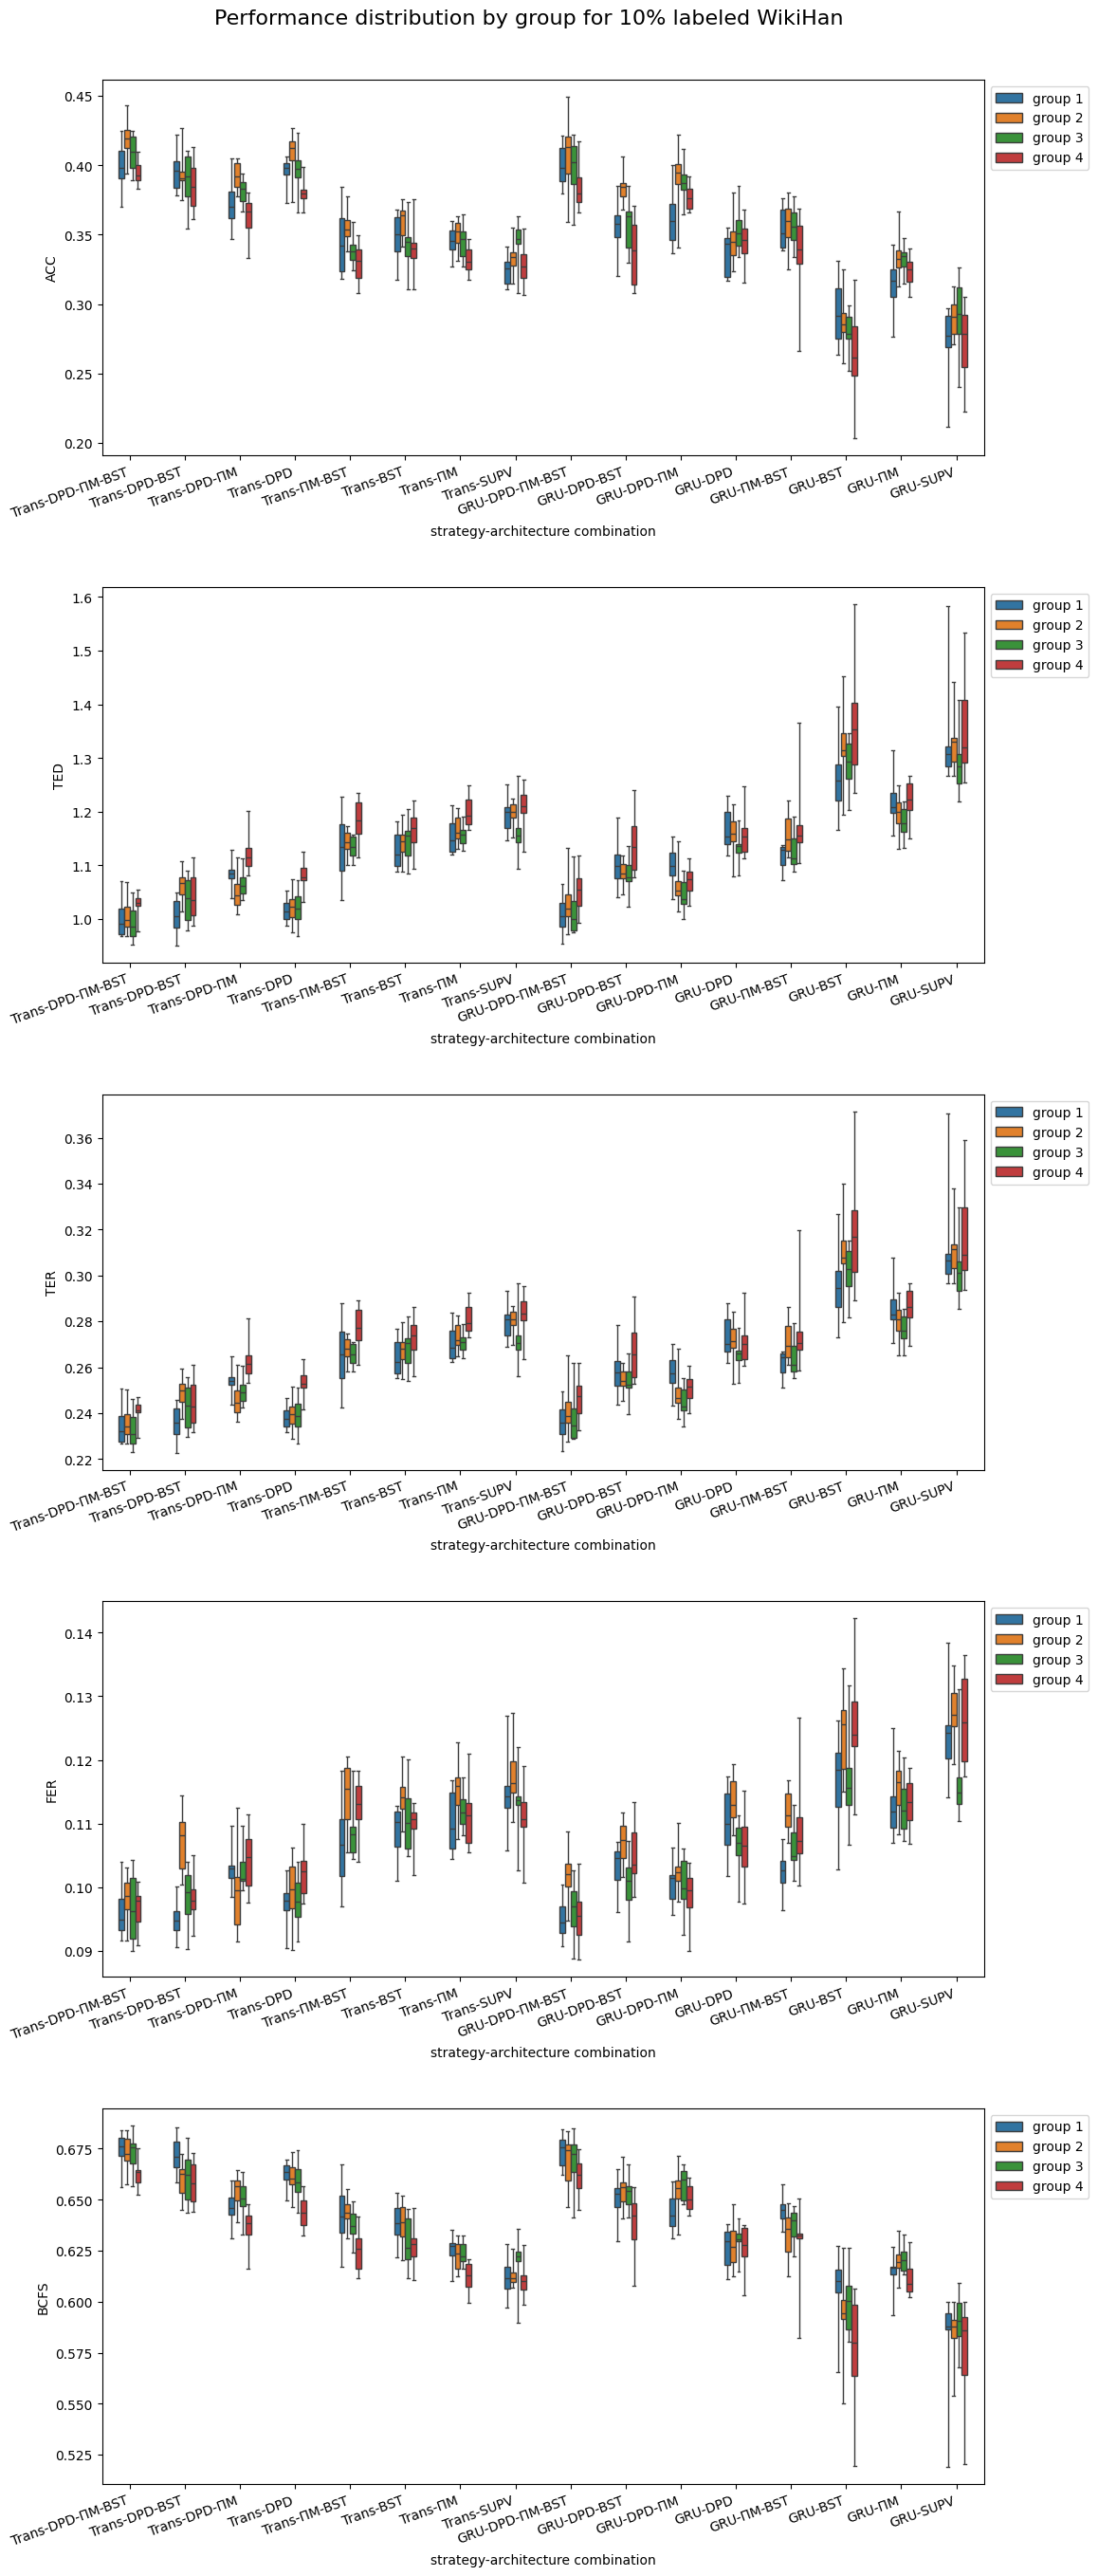

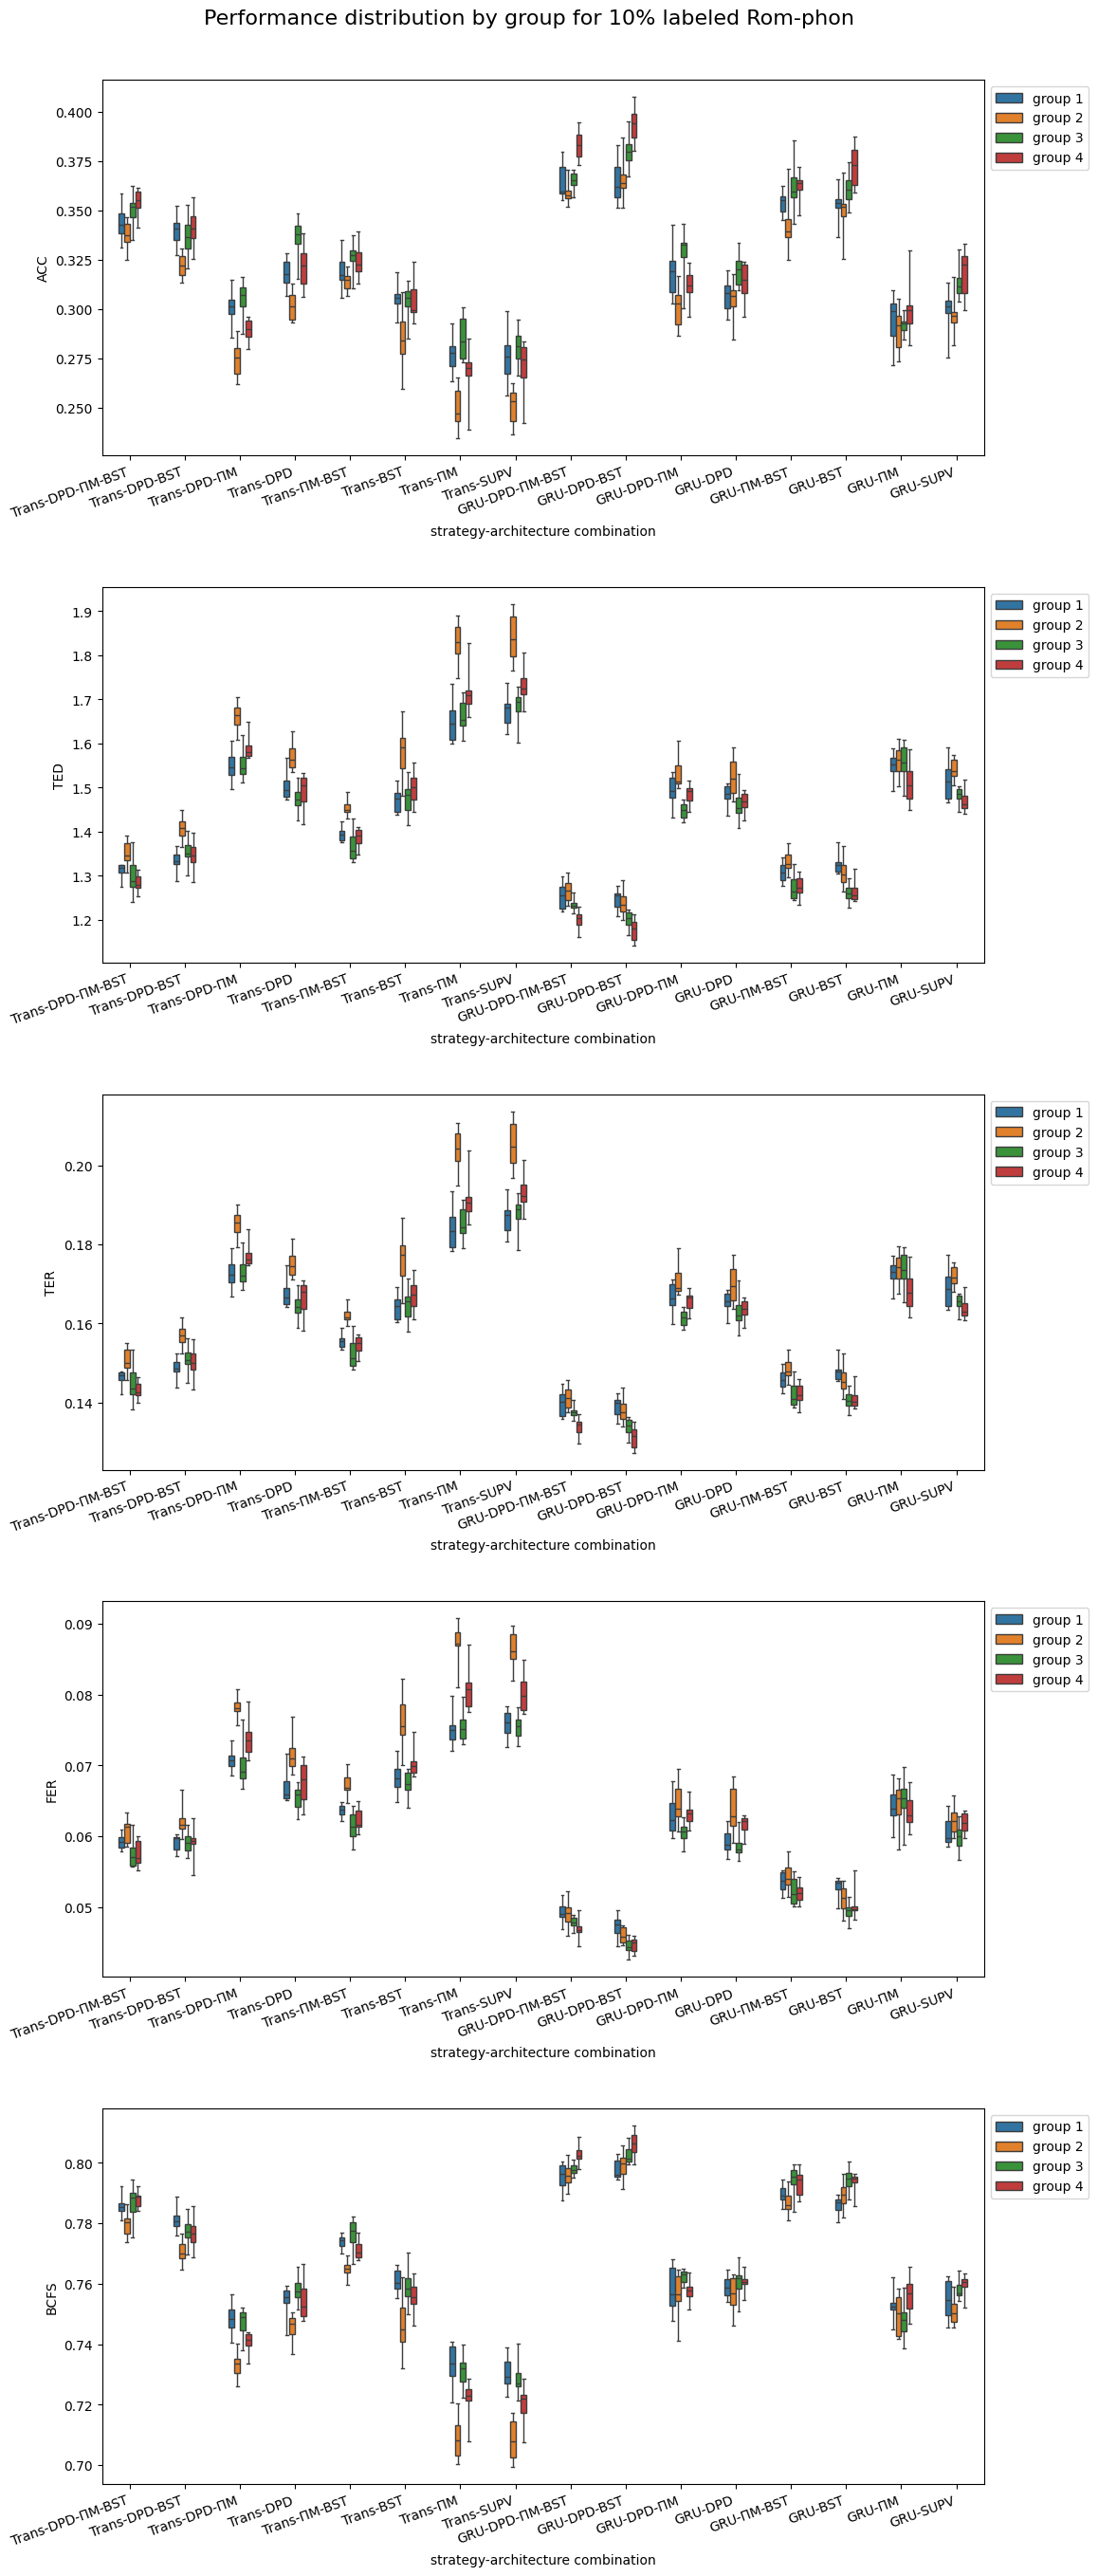

In [6]:
def same_p_group_hue_allM_plots(proportion_labelled, dataset) -> None:
    
    df = gt_filtered_df(dataset=f"{dataset}", proportion_labelled=proportion_labelled)
    df['strat_archi_id'] = df['strat_archi_id'].apply(lambda s: STRAT_ARCHIS_PLT_NAMES[s])
    df['group'] = df['group'].apply(lambda s: GROUP_PLT_NAMES[s])
    df = df.rename(columns=METRIC_PLT_NAMES)

    
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 30))
    for ax, m in zip(axes, allM):
        sns.boxplot(
            data=df,
            y=METRIC_PLT_NAMES[m], x="strat_archi_id", hue="group", whis=[0, 100], width=.4,
            order=[STRAT_ARCHIS_PLT_NAMES[s] for s in PLOT_STRAT_ARCHI_ORD], 
            ax=ax,
            hue_order=[GROUP_PLT_NAMES[s] for s in gt_groups_for_porportion(proportion_labelled)],
        )
        # ax.set_title(METRIC_PLT_NAMES[m])
        ax.set_xlabel('strategy-architecture combination')
        ax.legend(title=None)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')

    fig.suptitle(f"Performance distribution by group for {int(proportion_labelled*100)}% labeled {DATASET_LATEX_NAMES[dataset]}", fontsize=16)
    plt.subplots_adjust(top=0.955, hspace=0.35)  # Adjust the top margin and add vertical spacing

    # fig.savefig(f'{PLOT_OUT_PATH}/{dataset} {proportion_labelled} allM by group and strat_archi_id.png', bbox_inches='tight')
    # fig.savefig(f'{PLOT_OUT_PATH}/{dataset} {proportion_labelled} allM by group and strat_archi_id.eps', bbox_inches='tight', format='eps', dpi=1000)
    # plt.show()

# same_p_group_hue_allM_plots(proportion_labelled=0.05, dataset='chinese_wikihan2022')
same_p_group_hue_allM_plots(proportion_labelled=0.1, dataset='chinese_wikihan2022')
# same_p_group_hue_allM_plots(proportion_labelled=0.2, dataset='chinese_wikihan2022')
# same_p_group_hue_allM_plots(proportion_labelled=0.3, dataset='chinese_wikihan2022')
# same_p_group_hue_allM_plots(proportion_labelled=0.05, dataset='Nromance_ipa')
same_p_group_hue_allM_plots(proportion_labelled=0.1, dataset='Nromance_ipa')
# same_p_group_hue_allM_plots(proportion_labelled=0.2, dataset='Nromance_ipa')
# same_p_group_hue_allM_plots(proportion_labelled=0.3, dataset='Nromance_ipa')

In [7]:
def same_p_stratarchi_hue_mGrid(proportion_labelled, dataset):
    # 0.1 perf grid
    grid = sns.pairplot(gt_filtered_df(dataset=f"{dataset}", proportion_labelled=proportion_labelled), vars=allM, hue="strat_archi_id", 
        palette=sns.color_palette("tab20"),
        plot_kws=dict(marker="+", linewidth=1),
    )
    grid.fig.suptitle(f"Pairplot of {dataset} {proportion_labelled}")
    # grid.savefig(f"{PLOT_OUT_PATH}/{dataset} {proportion_labelled} allM pairplot.png")
    # grid.savefig(f"{PLOT_OUT_PATH}/{dataset} {proportion_labelled} allM pairplot.eps", format='eps', dpi=1000)

/Users/chaosarium/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  func(x=vector, **plot_kwargs)
/Users/chaosarium/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  func(x=vector, **plot_kwargs)
/Users/chaosarium/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  func(x=vector, **plot_kwargs)
/Users/chaosarium/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  func(x=vector, **plot_kwargs)
/Users/chaosarium/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (20) than needed (16), whic

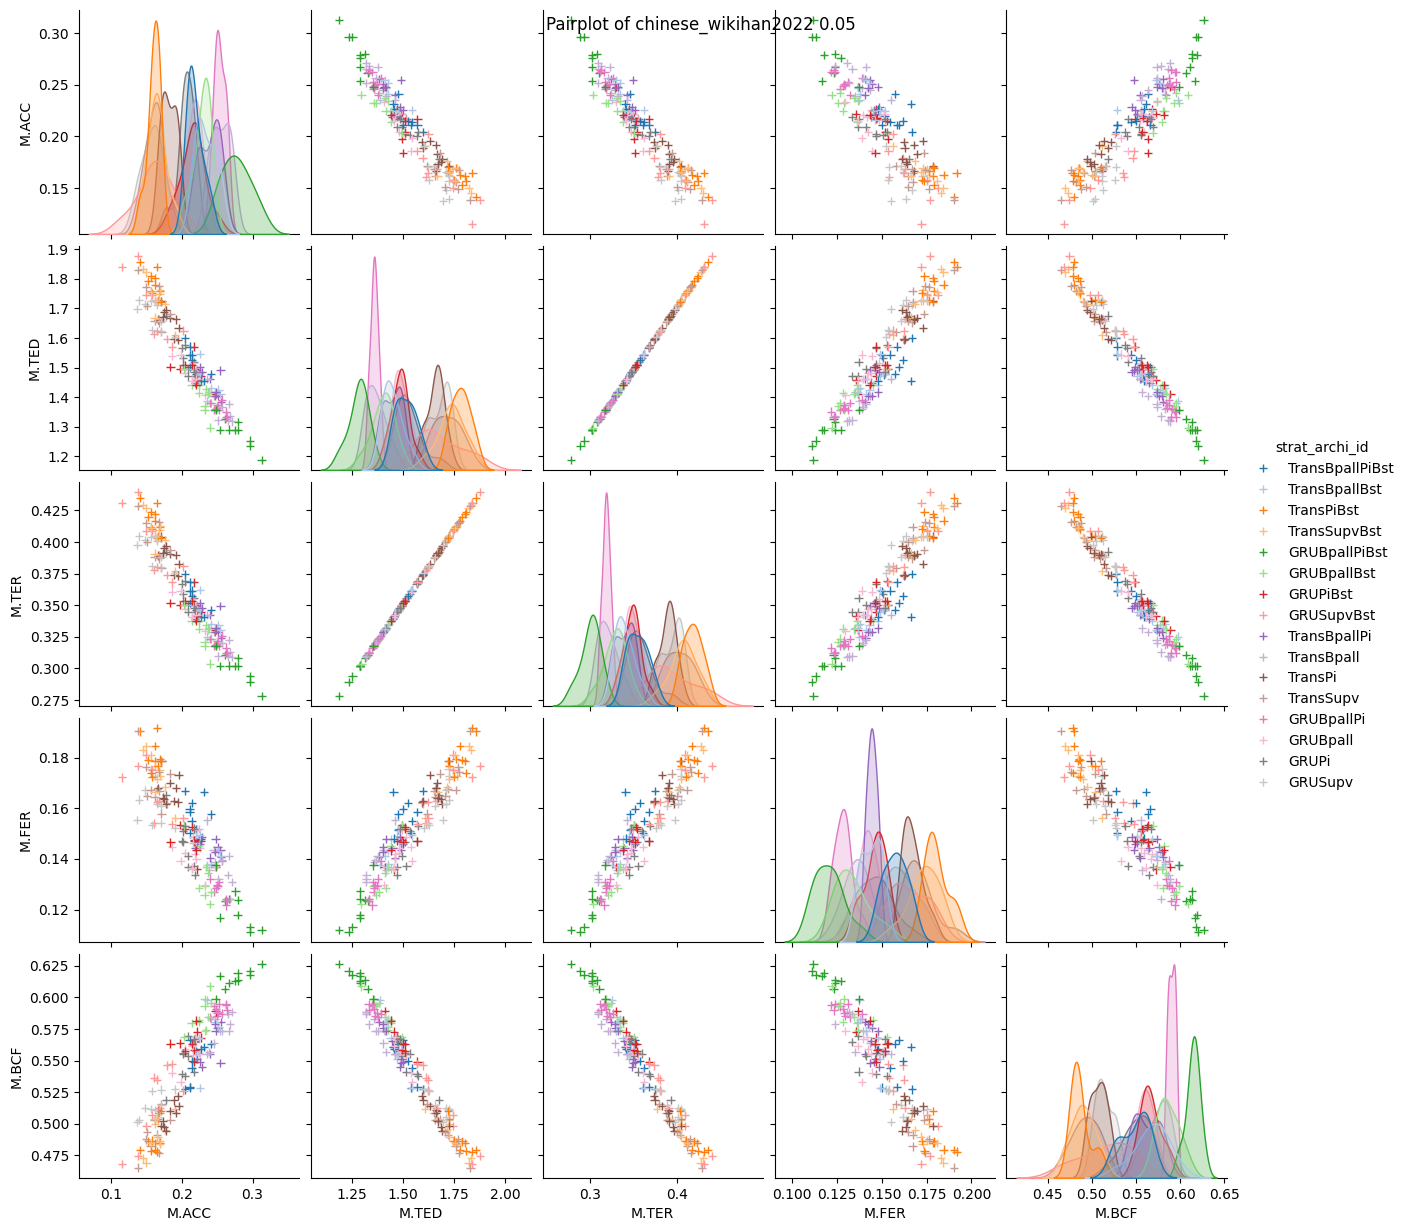

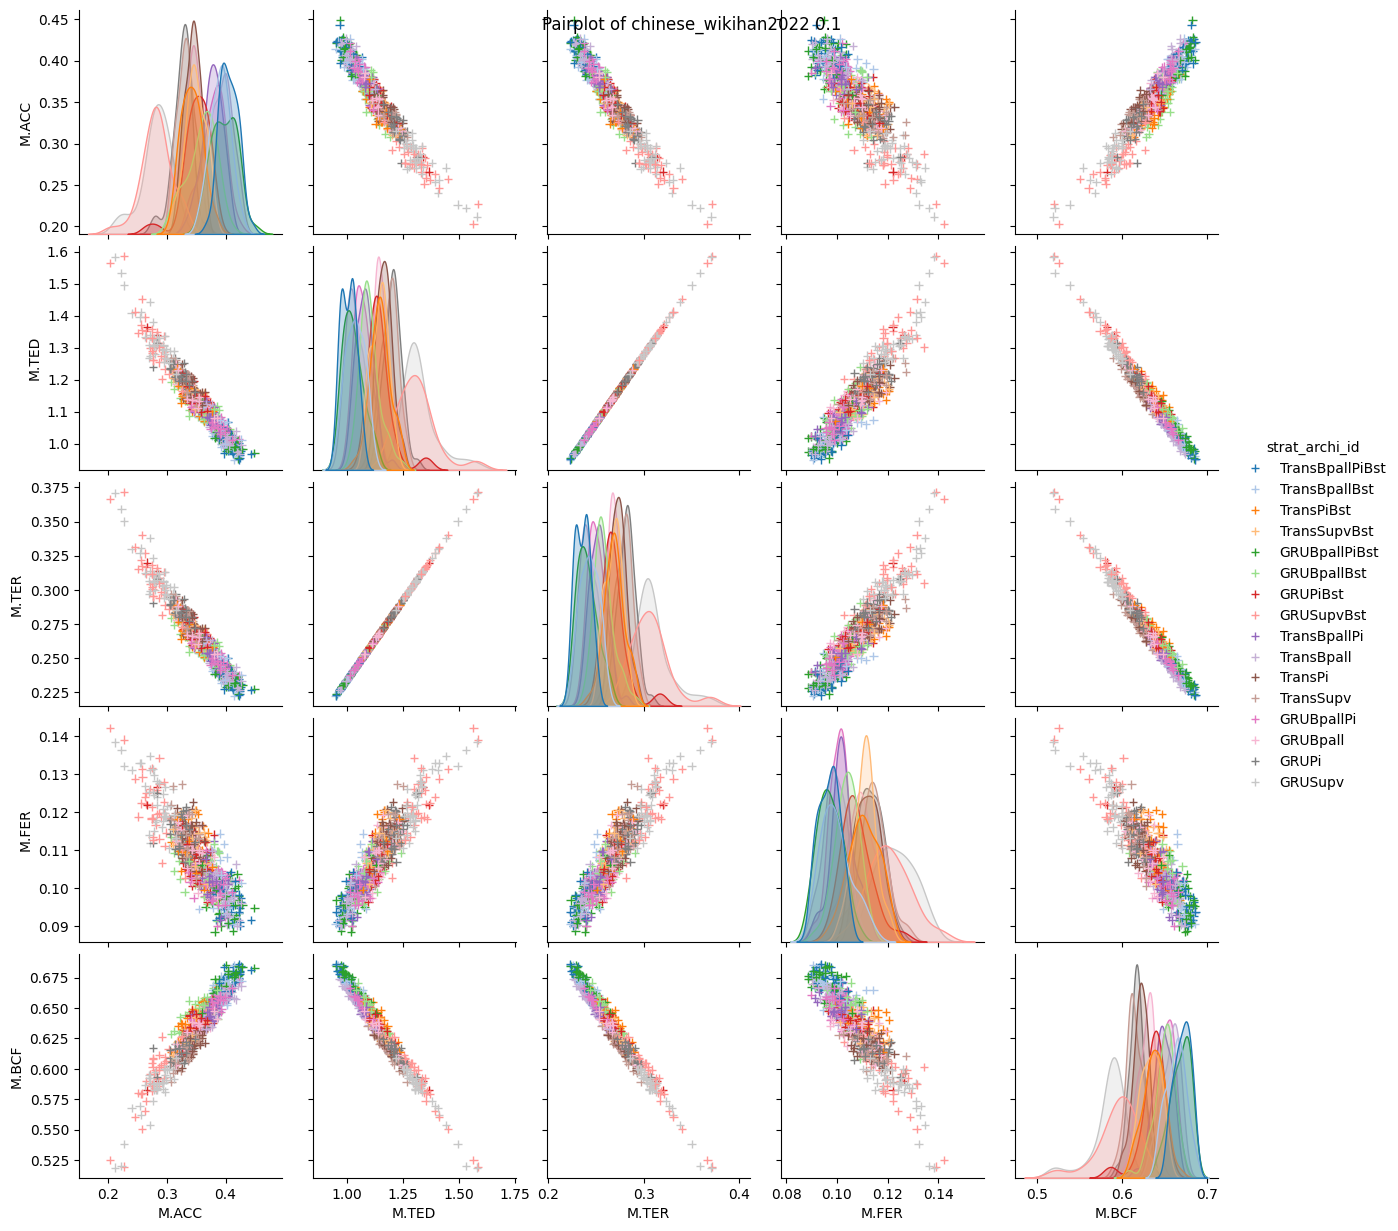

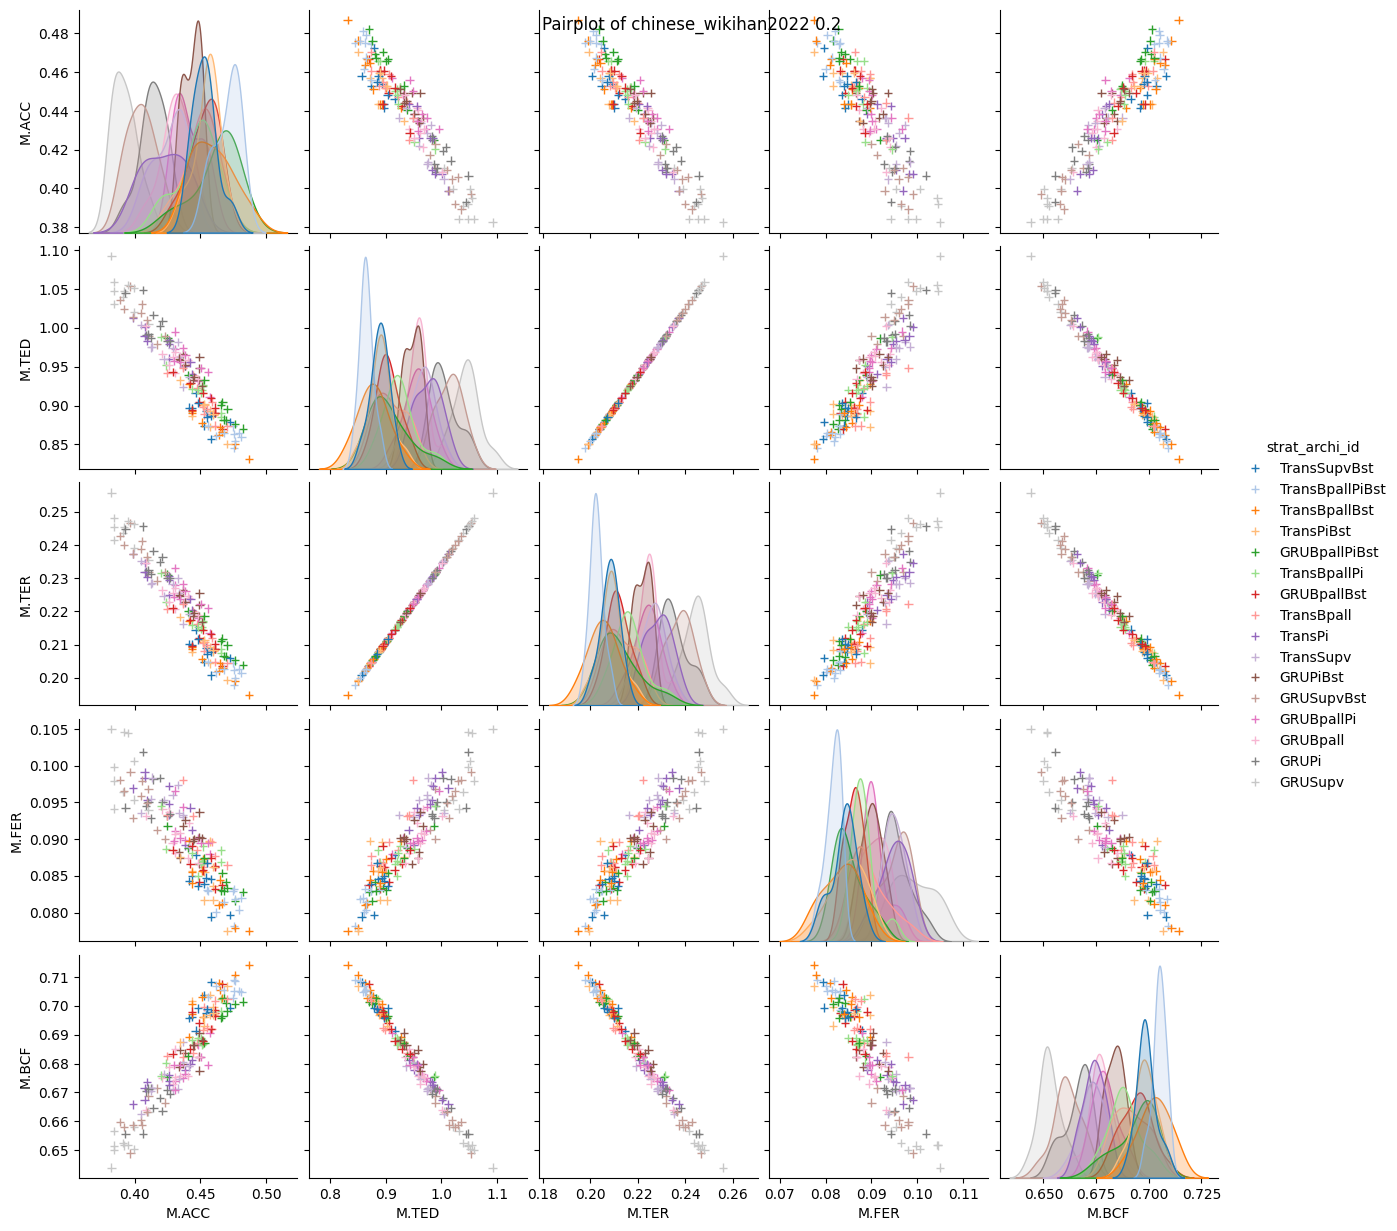

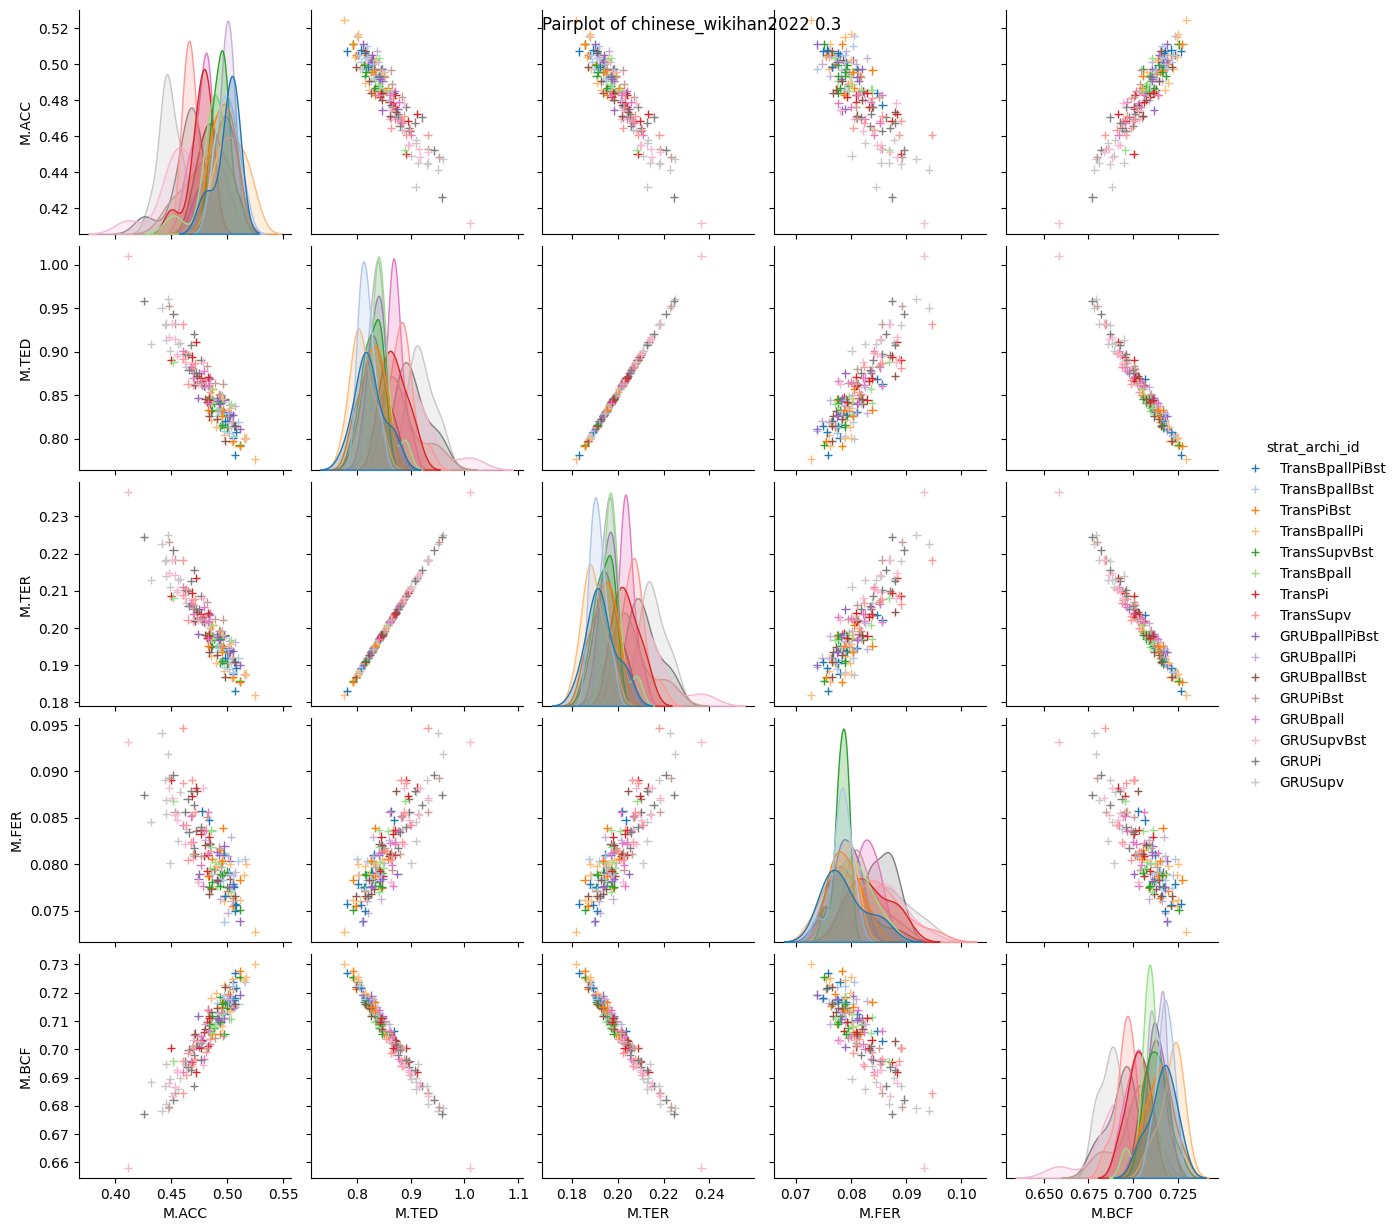

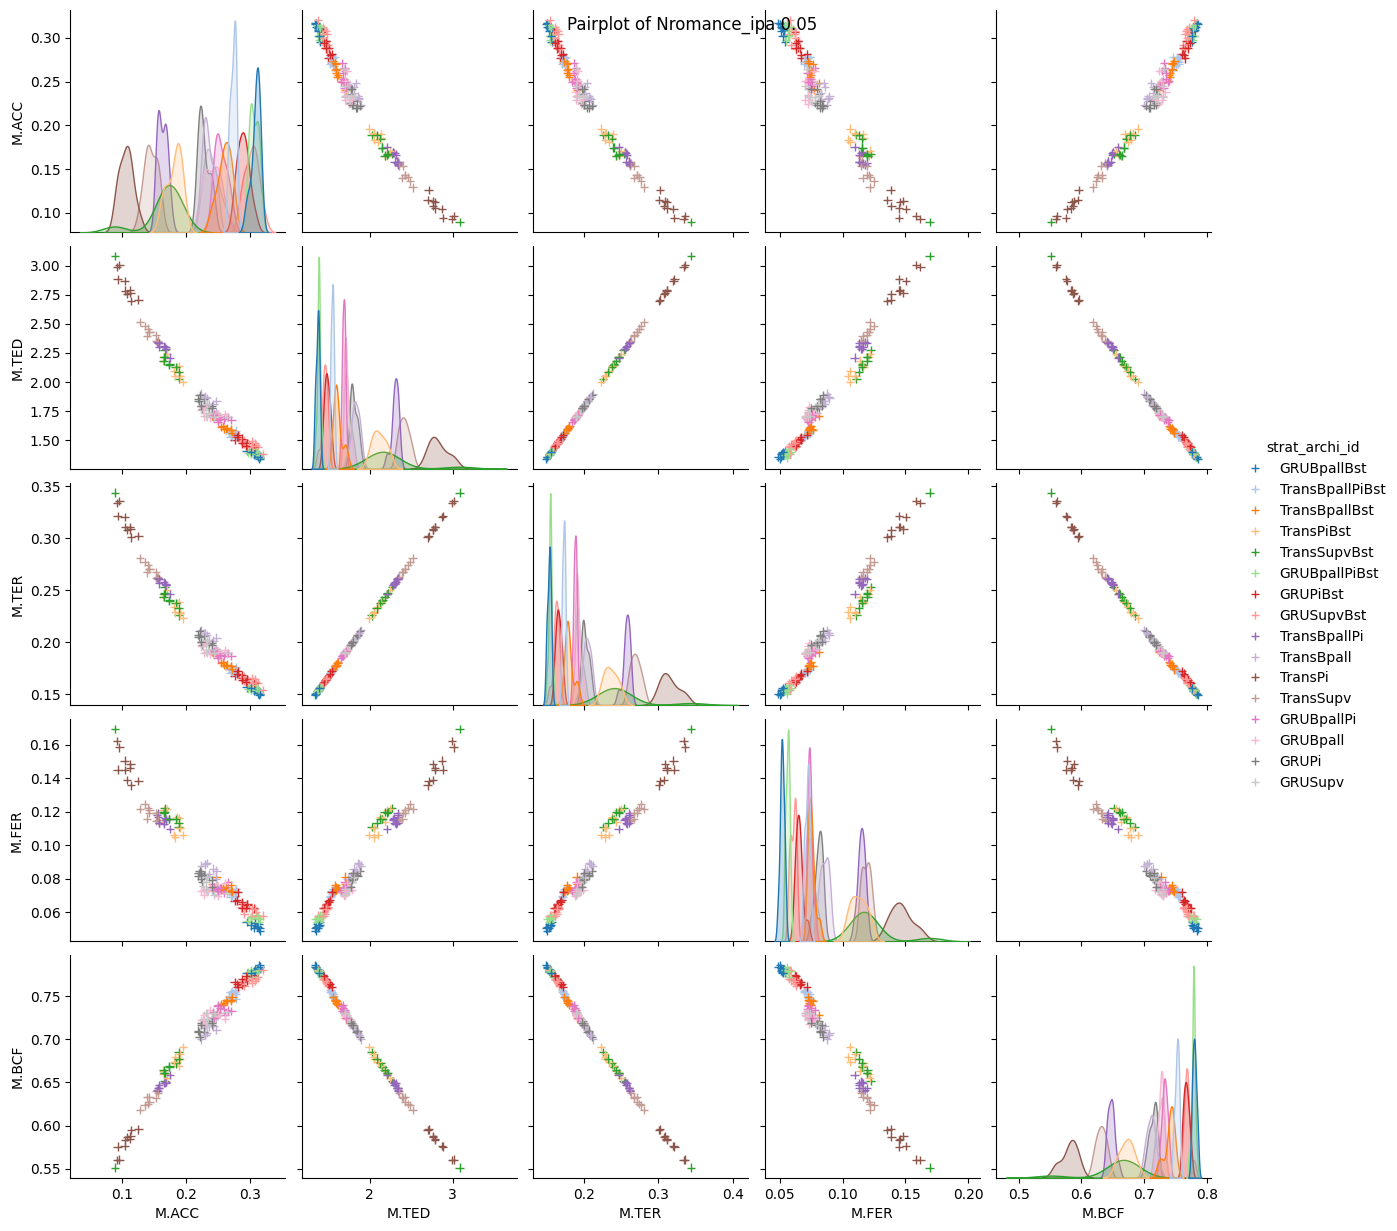

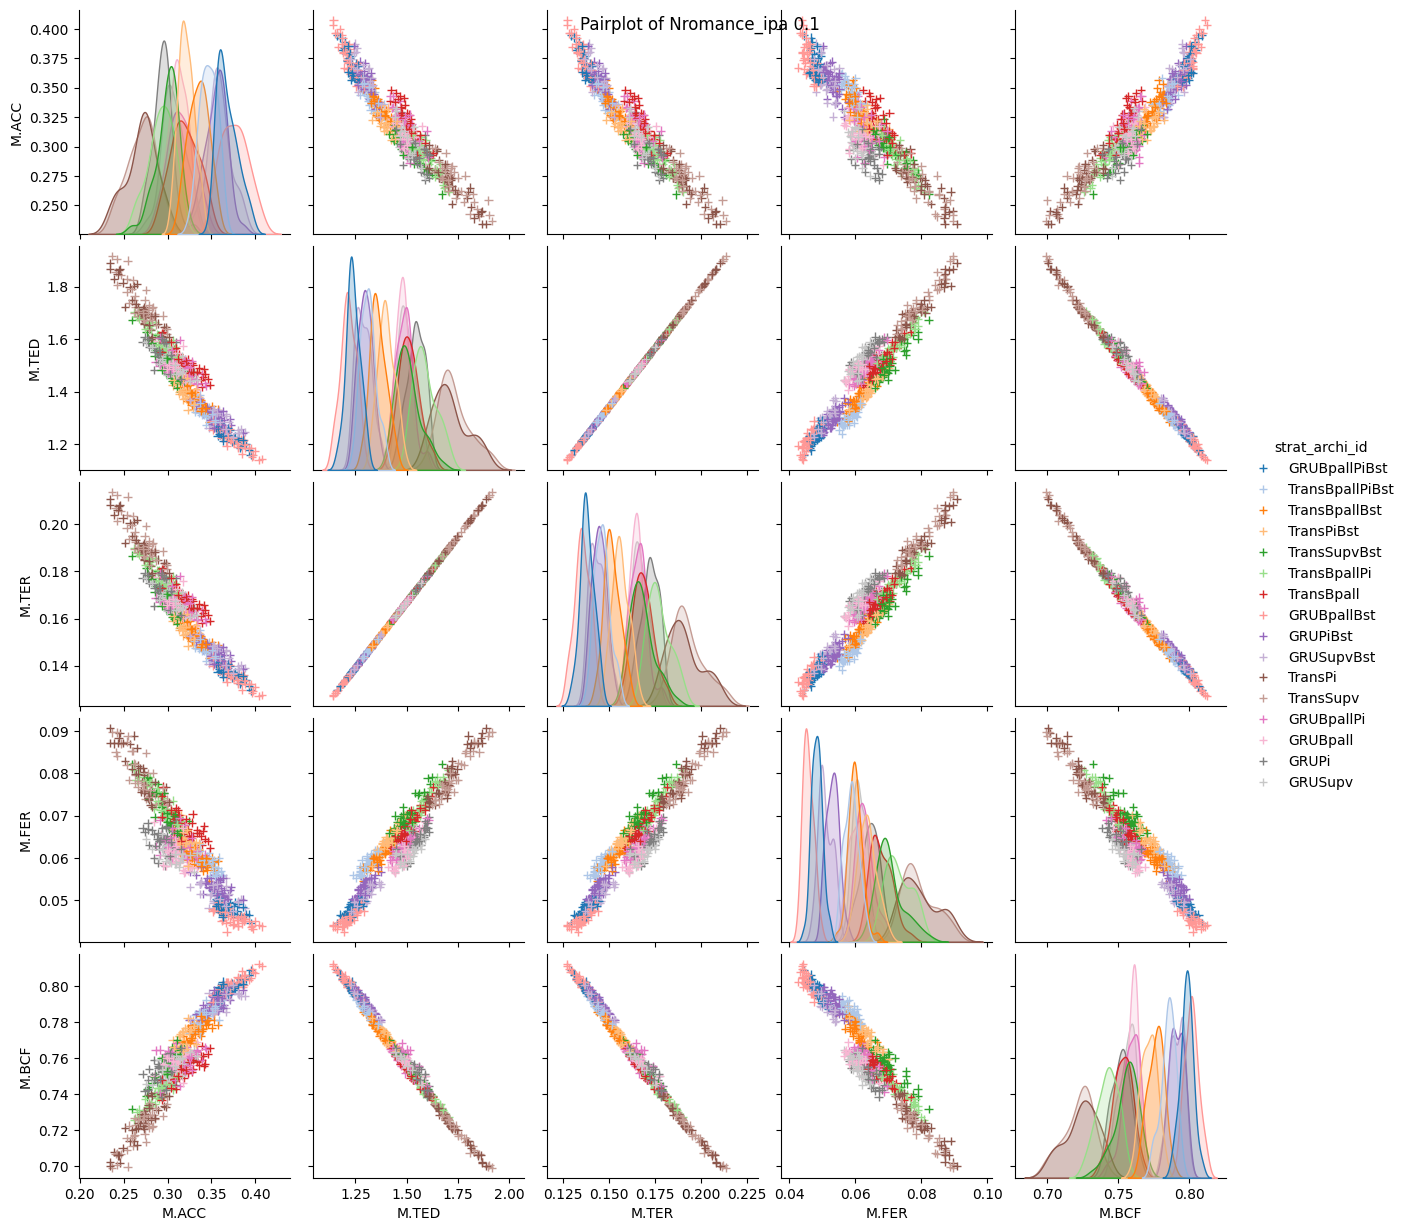

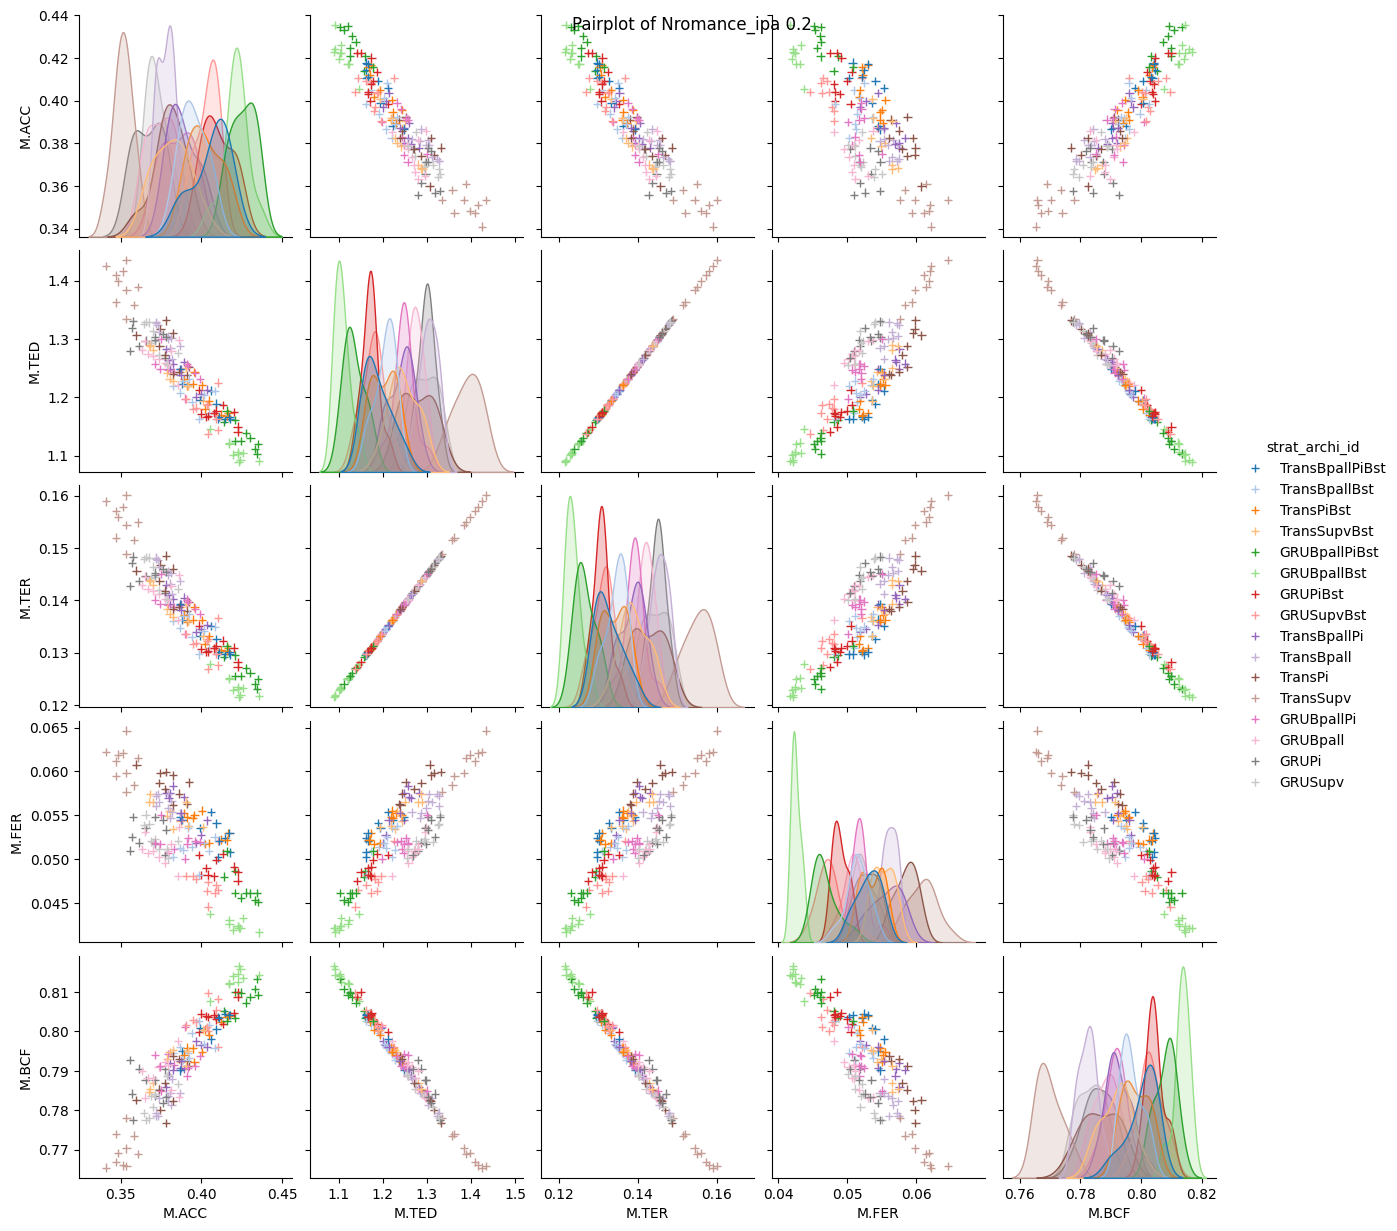

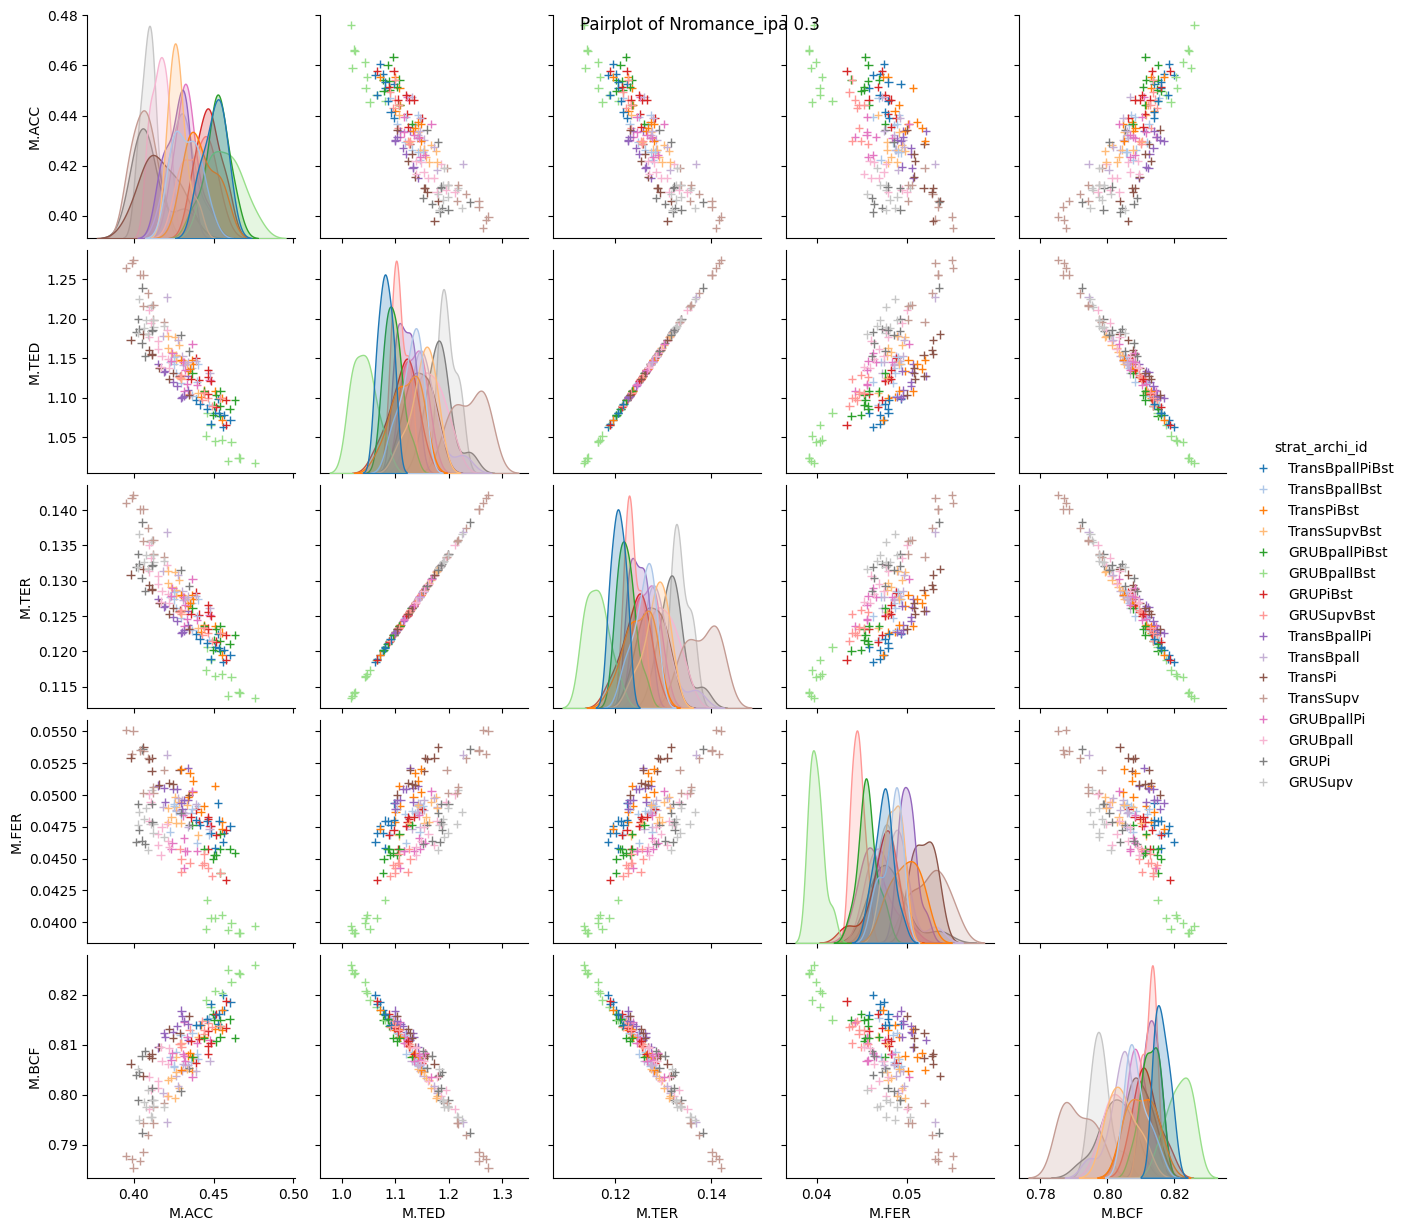

In [8]:
same_p_stratarchi_hue_mGrid(proportion_labelled=0.05, dataset='chinese_wikihan2022')
same_p_stratarchi_hue_mGrid(proportion_labelled=0.1, dataset='chinese_wikihan2022')
same_p_stratarchi_hue_mGrid(proportion_labelled=0.2, dataset='chinese_wikihan2022')
same_p_stratarchi_hue_mGrid(proportion_labelled=0.3, dataset='chinese_wikihan2022')
same_p_stratarchi_hue_mGrid(proportion_labelled=0.05, dataset='Nromance_ipa')
same_p_stratarchi_hue_mGrid(proportion_labelled=0.1, dataset='Nromance_ipa')
same_p_stratarchi_hue_mGrid(proportion_labelled=0.2, dataset='Nromance_ipa')
same_p_stratarchi_hue_mGrid(proportion_labelled=0.3, dataset='Nromance_ipa')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/var/folders/wn/_grd29tn5x9cg9p9_wtwb9nc0000gn/T/ipykernel_3072/3725956923.py:9: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  sns.boxplot(
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/var/folders/wn/_grd29tn5x9cg9p9_wtwb9nc0000gn/T/ipykernel_3072/3725956923.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(float(x.get_text())*100)}%' for x in ax.get_xticklabels()])
INFO:matplotlib.category:Using categorical units to plot a list of strings that

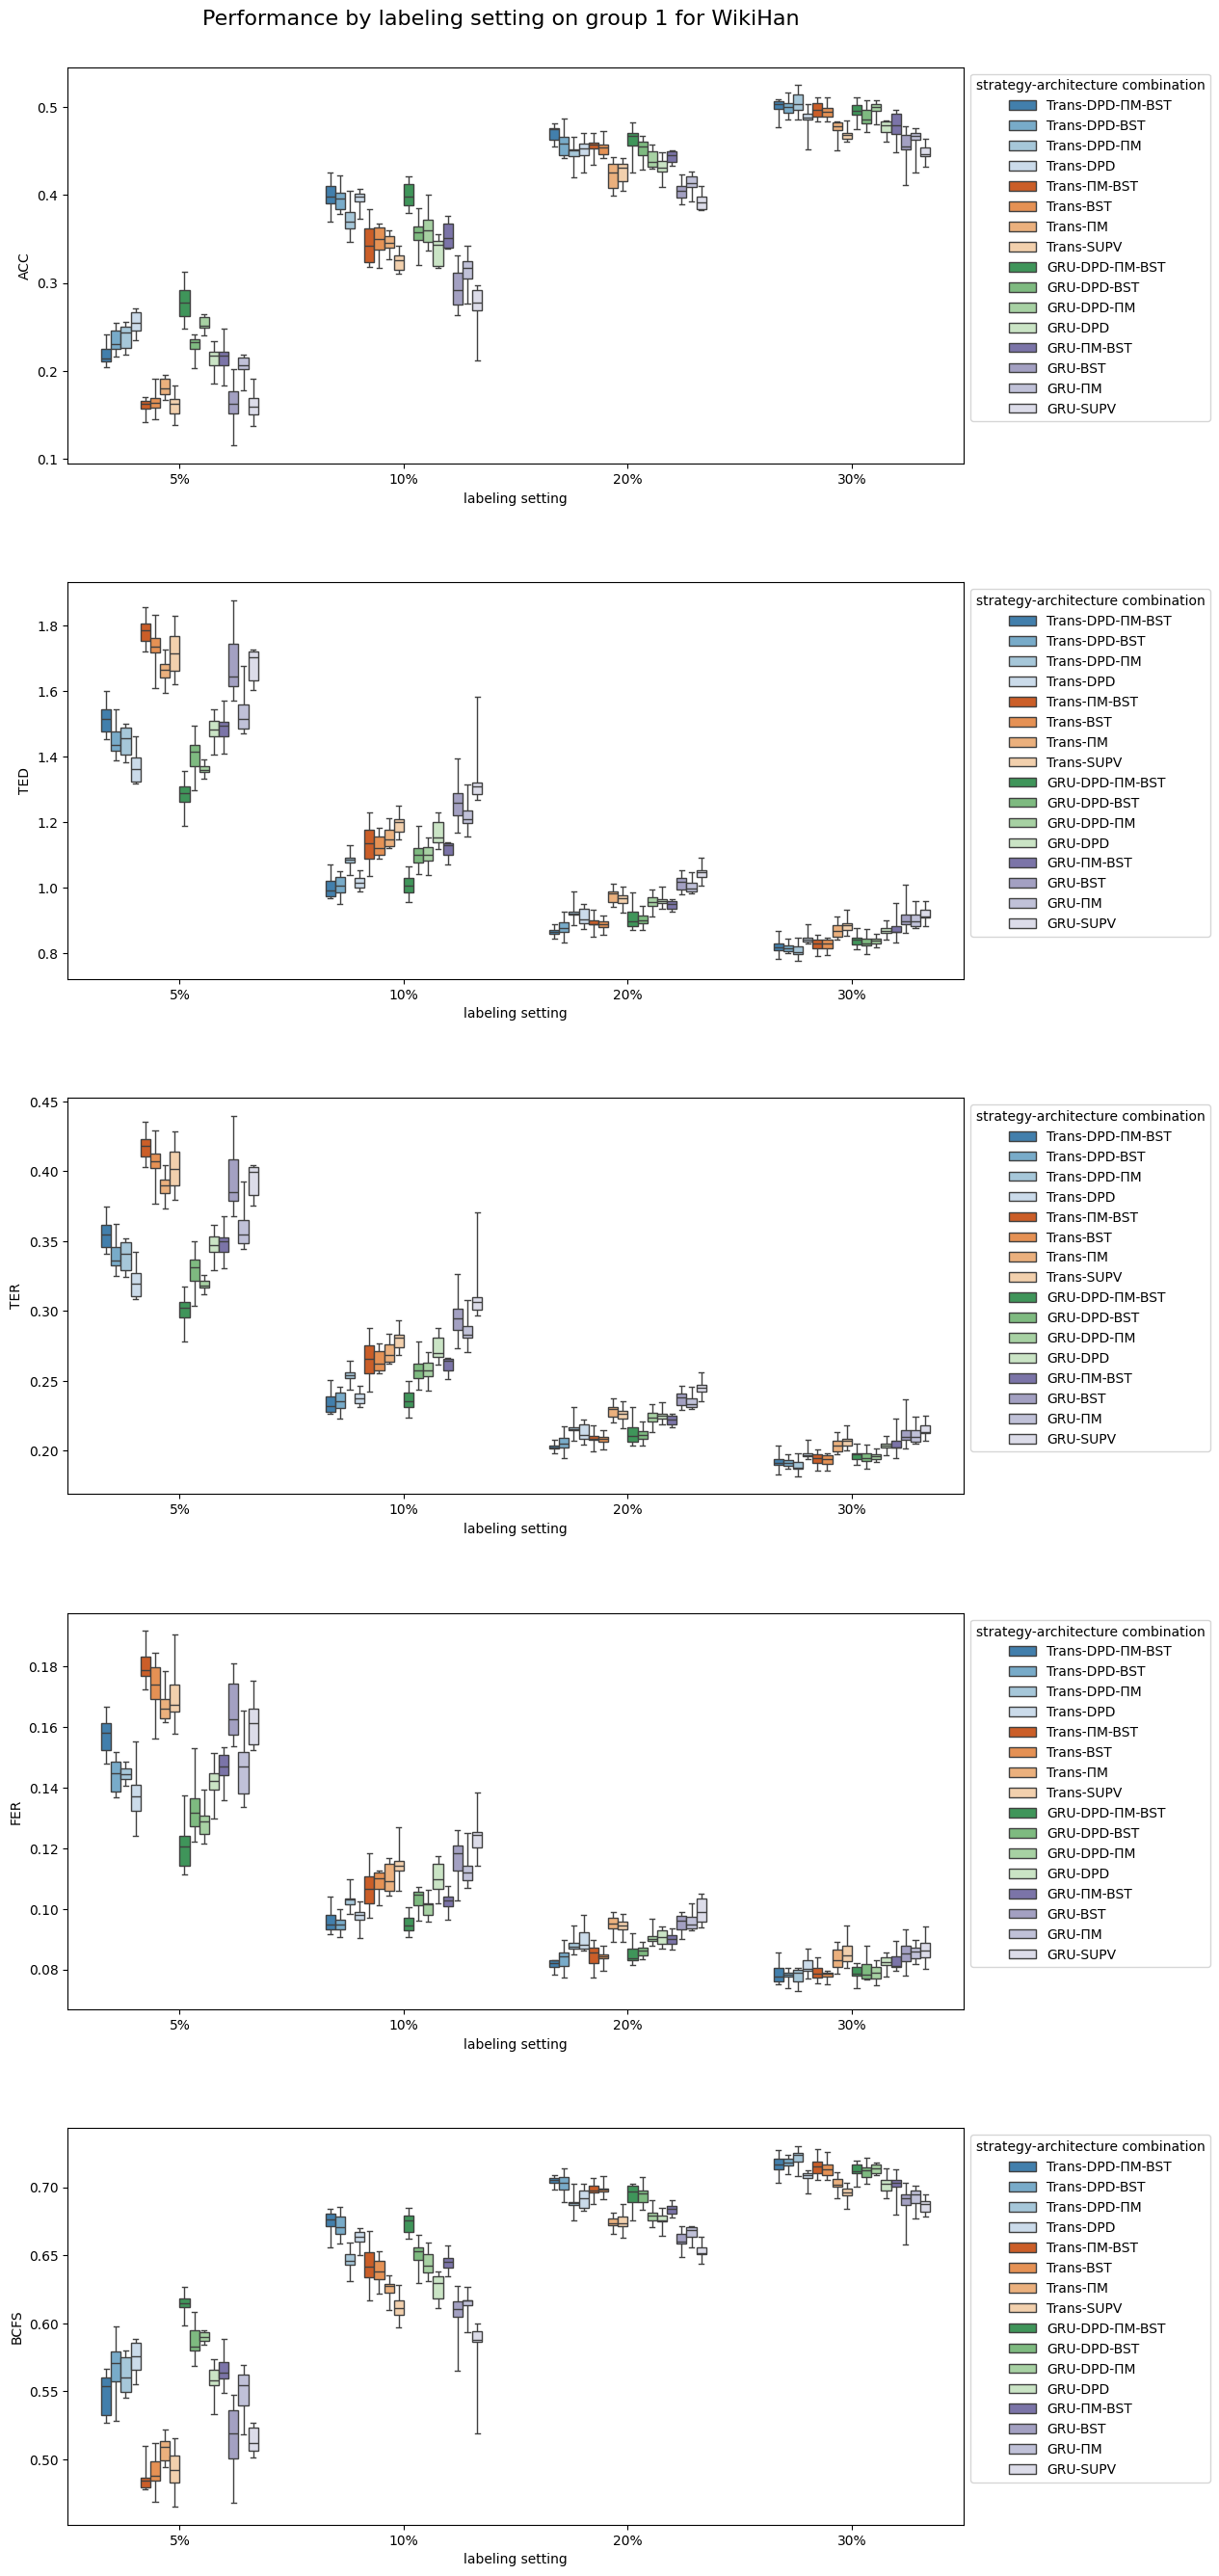

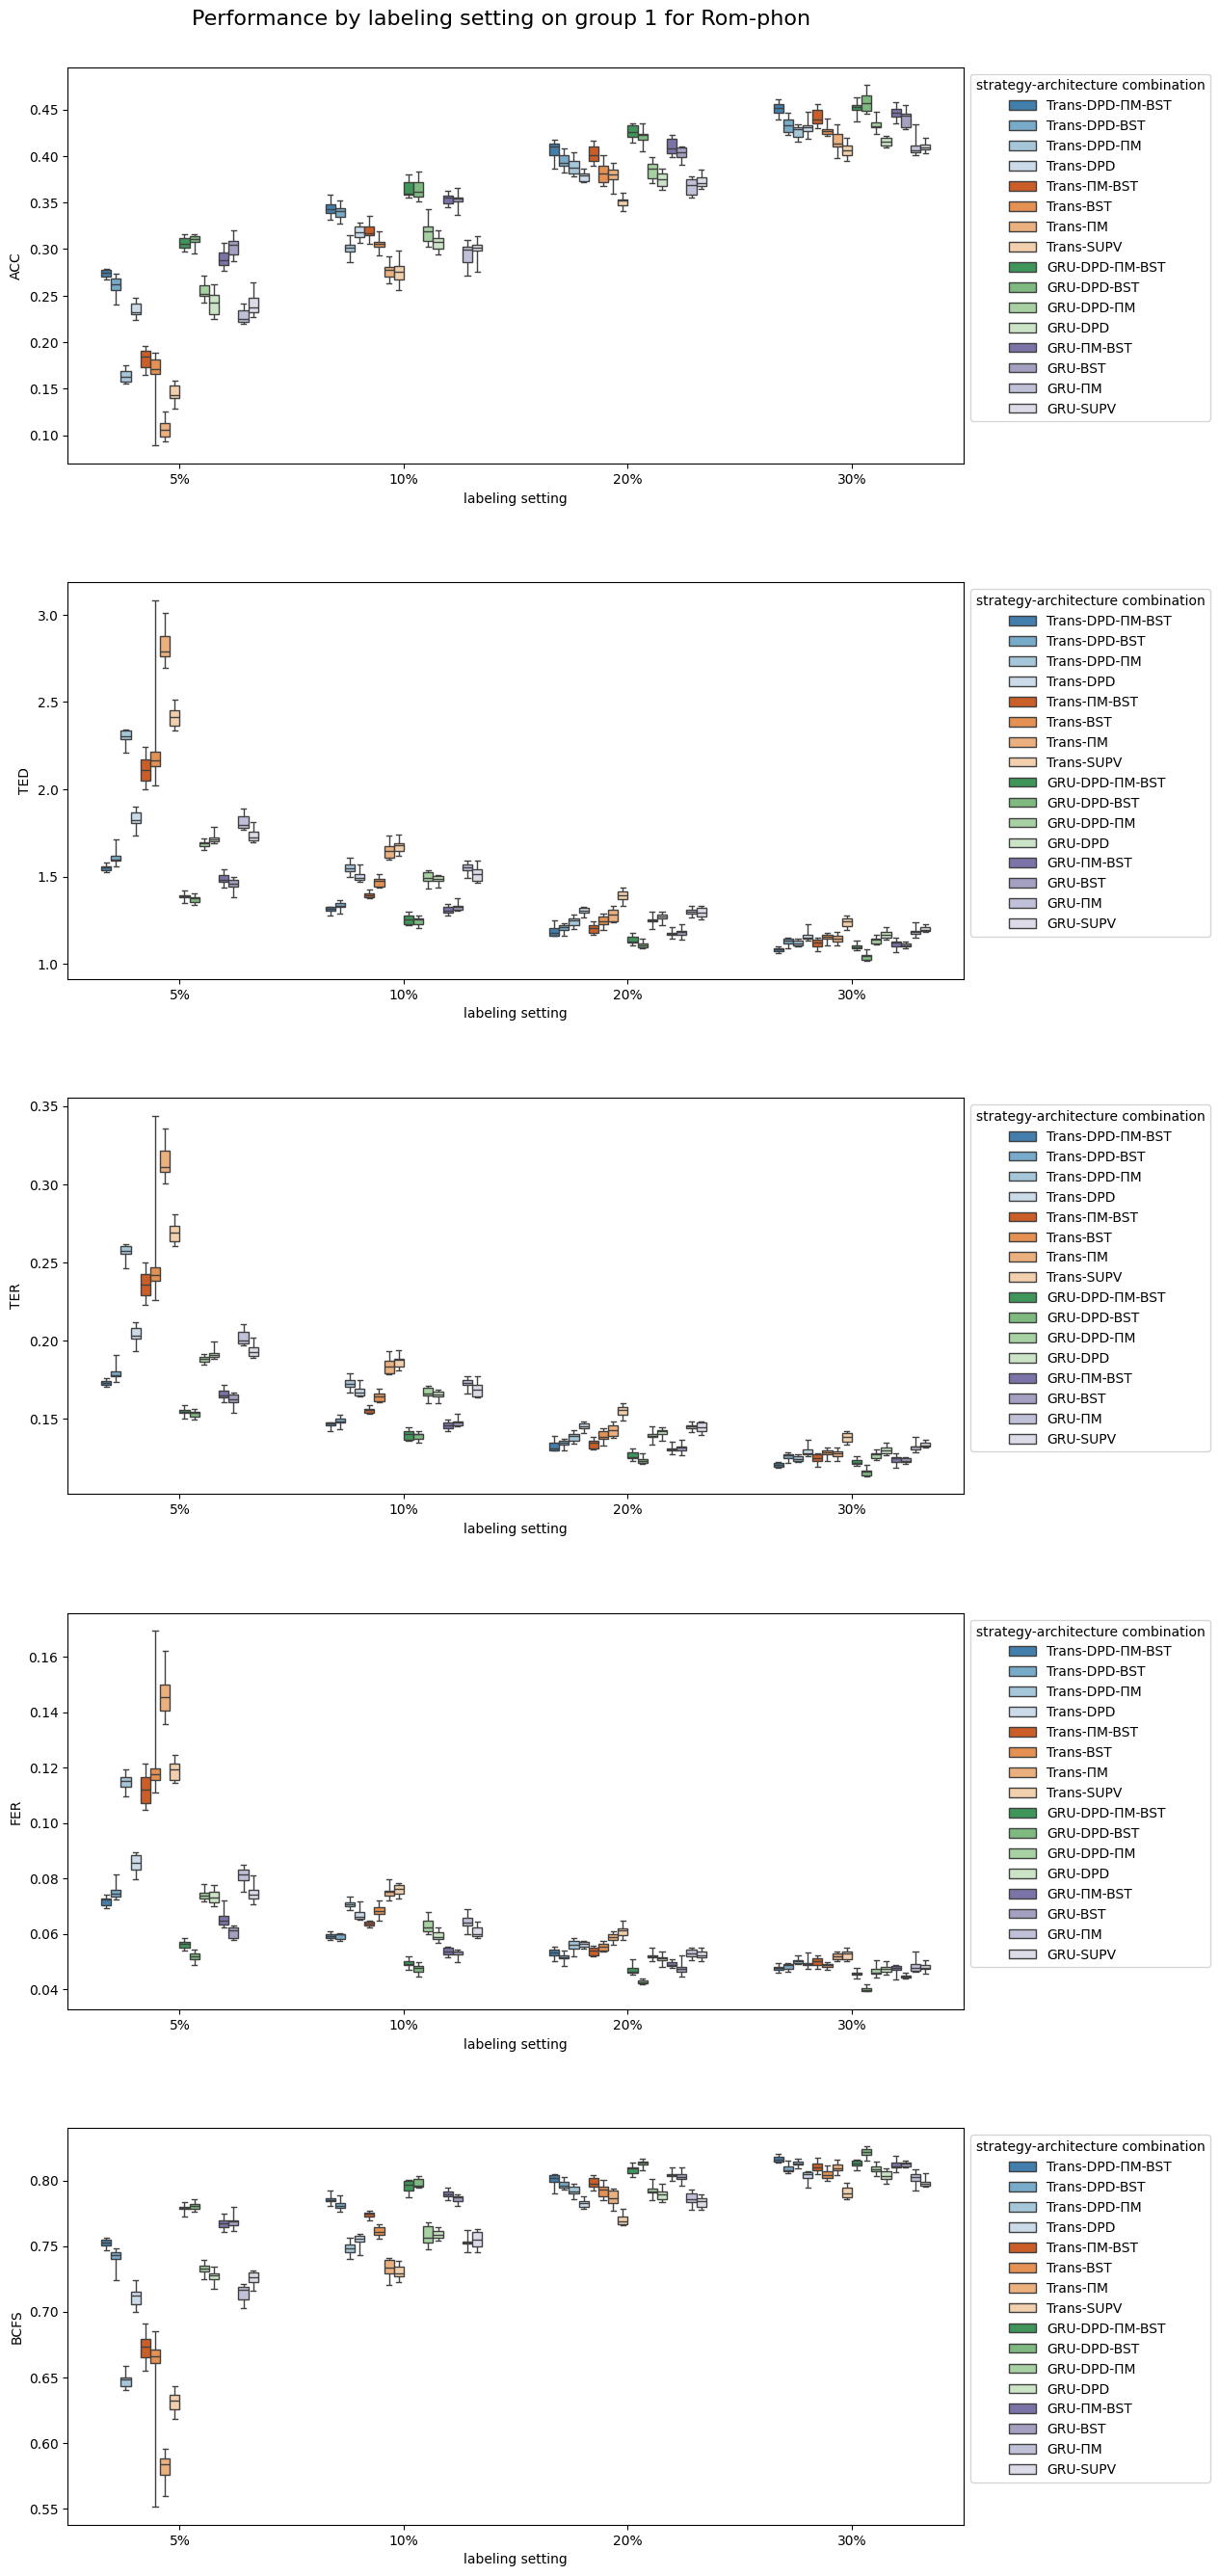

In [10]:
def diff_p_group1_stratarchi_hue_allM_plots(dataset):
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 30))
    df = pd.concat([gt_filtered_df(dataset=f"{dataset}", group="group1"), gt_filtered_df(dataset=f"{dataset}", group="group1", exclude_unlabelled=False, proportion_labelled=1.0)])
    df['strat_archi_id'] = df['strat_archi_id'].apply(lambda s: STRAT_ARCHIS_PLT_NAMES[s])
    # df['group'] = df['group'].apply(lambda s: GROUP_PLT_NAMES[s])
    df = df.rename(columns=METRIC_PLT_NAMES)

    for ax, m in zip(axes, allM):
        sns.boxplot(
            data=df, y=METRIC_PLT_NAMES[m], x="proportion_labelled", hue="strat_archi_id",
            whis=[0, 100], width=0.7,
            palette=sns.color_palette("tab20c"),
            hue_order=[STRAT_ARCHIS_PLT_NAMES[s] for s in PLOT_STRAT_ARCHI_ORD],
            ax=ax,
        )
        ax.legend(title='strategy-architecture combination')
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set_xlabel('labeling setting')
        # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        # ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')
        ax.set_xticklabels([f'{int(float(x.get_text())*100)}%' for x in ax.get_xticklabels()])

    fig.suptitle(f"Performance by labeling setting on group 1 for {DATASET_LATEX_NAMES[dataset]}", fontsize=16)
    plt.subplots_adjust(top=0.96, hspace=0.3)  # Adjust the top margin and add vertical spacing
    

    # fig.savefig(f'{PLOT_OUT_PATH}/{dataset} group1 allM by proportion_labelled and strat_archi_id.png', bbox_inches='tight')
    # fig.savefig(f'{PLOT_OUT_PATH}/{dataset} group1 allM by proportion_labelled and strat_archi_id.eps', bbox_inches='tight', format='eps', dpi=1000)

diff_p_group1_stratarchi_hue_allM_plots('chinese_wikihan2022')
diff_p_group1_stratarchi_hue_allM_plots('Nromance_ipa')